#               Project On Bengluru Price Prediction

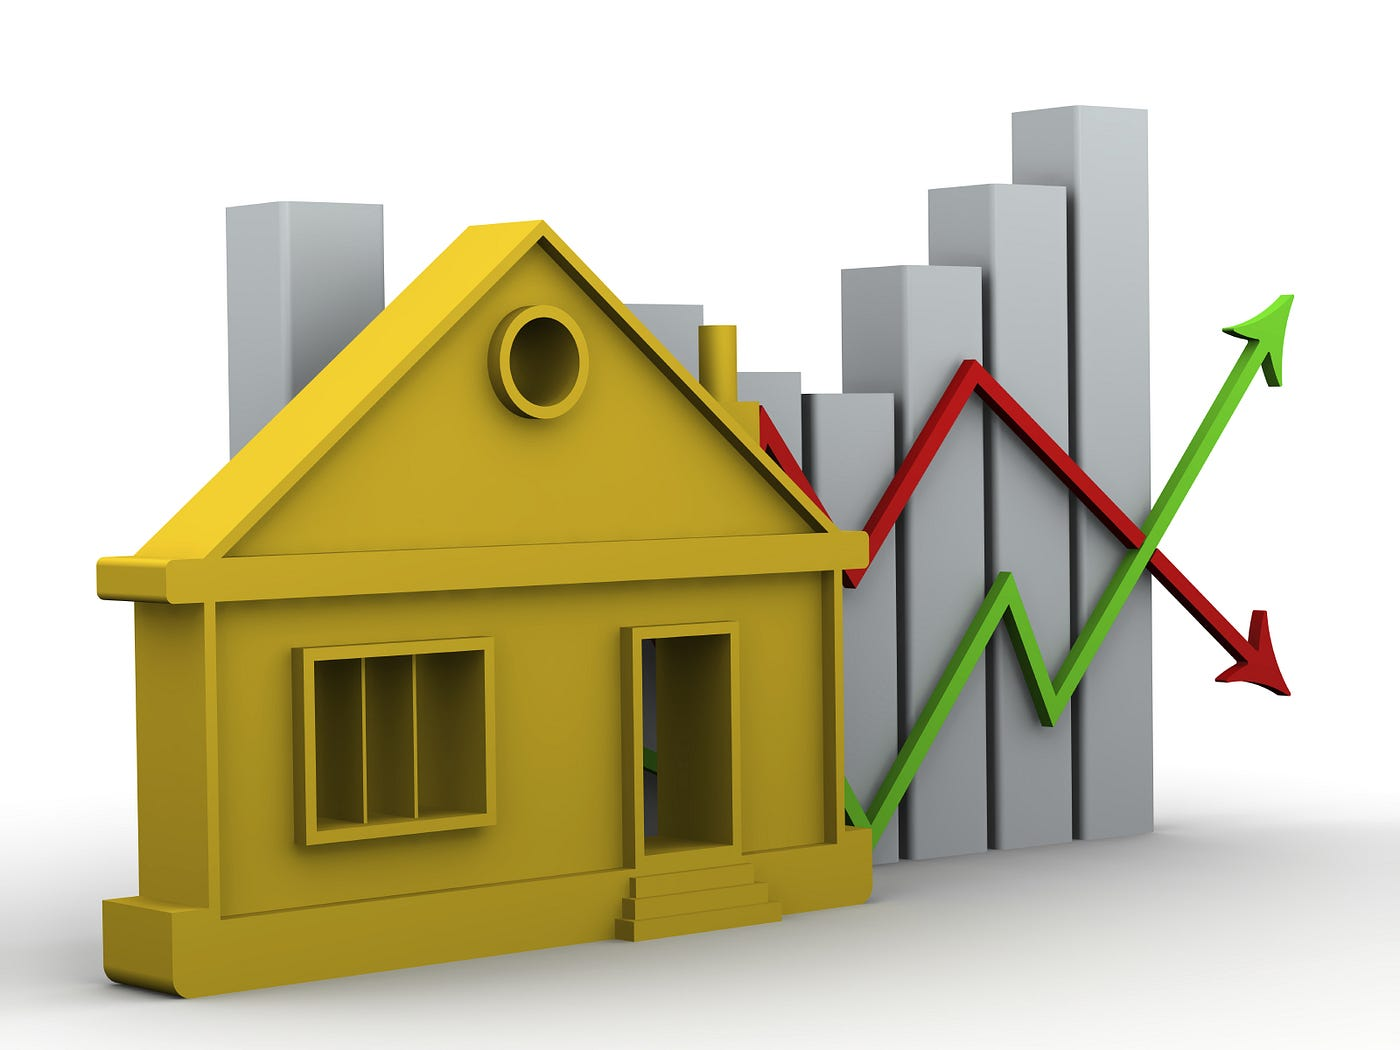

In [1]:
from IPython import display
display.Image("0 cDRFtpTiOJFrfzS5.jpg")

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv",  encoding='latin1')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# checking unique Dataset

In [7]:
for i in df:
    print()
    print(i)
    
    print(df[i].unique())


area_type
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

availability
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']

location
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extensio

In [8]:
df["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [9]:
df["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

# availability

In [10]:
# Plot Area is Filled in Size, Bath, Balcony as 0
df.loc[df["availability"] == 'Immediate Possession', "size"] = 0

In [11]:
df.loc[df["availability"] ==  'Immediate Possession', ["bath", "balcony"]] = 0

In [12]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [13]:
poss = df[df["availability"] == 'Immediate Possession']
poss

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,0,Asiss B,1200 - 2400,0.0,0.0,34.185
1775,Plot Area,Immediate Possession,IVC Road,0,Orana N,2000 - 5634,0.0,0.0,124
2264,Plot Area,Immediate Possession,Banashankari,0,NaN,2400,0.0,0.0,460
2809,Plot Area,Immediate Possession,Sarjapur Road,0,AsdiaAr,1200 - 2400,0.0,0.0,28.785
2862,Plot Area,Immediate Possession,Devanahalli,0,Ajleyor,1500 - 2400,0.0,0.0,46.8
5333,Plot Area,Immediate Possession,Devanahalli,0,Emngs S,2100 - 5405,0.0,0.0,177.115
6423,Plot Area,Immediate Possession,Whitefield,0,SRniaGa,2324,0.0,0.0,26.73
6636,Plot Area,Immediate Possession,Jigani,0,S2enste,1500,0.0,0.0,25.49
6719,Plot Area,Immediate Possession,Hoskote,0,SJowsn,800 - 2660,0.0,0.0,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,0,NaN,5000,0.0,0.0,400


In [14]:
poss.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         3
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13320 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13263 non-null  float64
 7   balcony       12727 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [16]:
df["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1045
Name: balcony, dtype: int64

In [17]:
df["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
0.0       16
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [18]:
# othere values in the immidiate possesion column
for i in df["availability"]:
       if i != 'Ready To Move' and i!= 'Immediate Possession':
        print(i)

19-Dec
18-May
18-Feb
19-Dec
18-Nov
18-May
20-Dec
17-Oct
19-Dec
21-Dec
19-Dec
19-Sep
20-Sep
18-Mar
20-Feb
18-Apr
20-Aug
18-Apr
18-Oct
19-Mar
17-Sep
18-Dec
17-Aug
19-Apr
18-Dec
18-Jun
18-Mar
22-Dec
22-Jan
18-Aug
19-Mar
18-May
19-Jan
19-Dec
17-Jul
19-Apr
18-May
18-Jul
18-May
18-Dec
18-Apr
21-Jun
18-Dec
20-May
18-Jun
18-Dec
19-Mar
19-Dec
19-Aug
18-Apr
21-Jun
18-Aug
18-Sep
17-May
18-Jun
17-Jun
18-Oct
21-Dec
18-Aug
18-Jul
21-May
18-Jan
20-Dec
18-Apr
18-Apr
18-Dec
18-Apr
20-Mar
19-Dec
18-Mar
21-Dec
18-Jun
18-Dec
18-May
21-Dec
18-Aug
18-Mar
19-Mar
18-May
18-May
19-Jan
20-Dec
21-Jun
18-Aug
19-Jan
17-Dec
18-Aug
18-Oct
17-Jul
16-Mar
18-Jul
18-Apr
18-Sep
18-May
18-Apr
18-May
18-Dec
18-May
19-Jun
22-Jun
18-Apr
17-Oct
19-Dec
17-May
19-Apr
18-Dec
19-Jul
18-Apr
17-Dec
18-Jul
18-Jun
18-Apr
20-Dec
18-Apr
18-Mar
18-Sep
18-Apr
21-Dec
21-Feb
19-Dec
18-Aug
18-May
19-Dec
18-Jul
19-May
17-Nov
19-Jan
18-May
18-Dec
19-Dec
18-Jul
18-Aug
18-Aug
20-Oct
18-Mar
18-Apr
18-Dec
18-Mar
18-Dec
18-May
19-Dec
18-Apr
17-Aug

In [19]:
# All other Date values filled with Not ready to move

data_row = df["availability"].apply(lambda x : not(x== 'Ready To Move' or x == 'Immediate Possession'))
df.loc[data_row, "availability"] = "not ready to move"

In [20]:
df["availability"].value_counts()

Ready To Move           10581
not ready to move        2723
Immediate Possession       16
Name: availability, dtype: int64

# Size

In [21]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
0               16
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
19 BHK           1
16 BHK           1
43 Bedroom       1
14 BHK           1
27 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [22]:
# all brdroom change to bhk
df["size"]= df["size"].str.replace("Bedroom", "BHK", regex = True)

In [23]:
df["size"] = df["size"].str.replace("RK", "BHK",regex= True)

In [24]:
df.loc[df["availability"] == 'Immediate Possession', "size"] = 0

In [25]:
df["size"].value_counts()  # all are in bhk only 0 is coming on plot area

2 BHK     5528
3 BHK     4857
4 BHK     1417
1 BHK      656
5 BHK      356
6 BHK      221
7 BHK      100
8 BHK       89
9 BHK       54
0           16
10 BHK      14
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: size, dtype: int64

In [26]:
for i in df:
    print(df[i].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
['not ready to move' 'Ready To Move' 'Immediate Possession']
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
['2 BHK' '4 BHK' '3 BHK' '6 BHK' '1 BHK' '8 BHK' '7 BHK' '5 BHK' '11 BHK'
 '9 BHK' 0 '27 BHK' '10 BHK' '19 BHK' '16 BHK' '43 BHK' '14 BHK' '12 BHK'
 '13 BHK' '18 BHK']
['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']
['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']
[ 2.  5.  3.  4.  6.  1.  9. nan  8.  7.  0. 11. 10. 14. 27. 12. 16. 40.
 15. 13. 18.]
[ 1.  3. nan  2.  0.]
[' $39.07 ' ' $120.00 ' ' $62.00 ' ... '40.14' '231' '488']


# total_sqft

In [27]:
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 2500)
pd.set_option('display.width', 2500)

In [28]:
df["total_sqft"].describe()

count     13320
unique     2117
top        1200
freq        843
Name: total_sqft, dtype: object

In [29]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [30]:
# Filter rows where 'total_sqft' column is NaN
nan_total_sqft_rows = df[df["total_sqft"].isna()]
print(nan_total_sqft_rows)

Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price]
Index: []


In [31]:
df["total_sqft"].value_counts()

1200                 843
1100                 221
1500                 205
2400                 196
600                  180
1000                 172
1350                 133
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 101
1140                  91
2000                  83
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1550                  60
1160                  60
1125                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
700                   52
750                   52
1225                  48
4000                  48
1175                  48


In [32]:
# finding avg of range values

df["total_sqft"] = df["total_sqft"].apply(lambda x : (float(x.split("-")[0]) + float(x.split("-")[1]))/2 if '-' in x else x)

In [33]:
df["total_sqft"].value_counts()

1200               843
1100               221
1500               205
2400               196
600                180
1000               172
1350               133
1050               123
1300               117
1250               114
900                112
1400               108
1800               104
1150               101
1600               101
1140                91
2000                83
1450                70
1650                69
800                 67
3000                66
1075                66
1020                63
2500                62
1550                60
1160                60
1125                60
950                 59
1180                58
1700                58
1260                57
1255                56
1220                55
1080                55
1070                53
700                 52
750                 52
1225                48
4000                48
1175                48
1320                46
1240                46
2100                46
1230       

In [34]:
# Filter rows where 'total_sqft' column is NaN

nan_total_sqft_rows = df[df["total_sqft"].isna()]
print(nan_total_sqft_rows)

Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price]
Index: []


In [35]:
 df["total_sqft"] = df["total_sqft"].str.replace("sq. Meter|Sq. Meter", "-sq. Meter", regex=True).fillna(df["total_sqft"])

In [36]:
# Filter rows where 'total_sqft' column is NaN

nan_total_sqft_rows = df[df["total_sqft"].isna()]
print(nan_total_sqft_rows)

Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price]
Index: []


In [37]:
# change sq. Meter unit values to sqft unit  (1 sqmt = 10.764 sqft)

def convert_sq_mt_to_sq_ft(value):
    if isinstance(value, float):
        return value  # Return the float value unchanged
    elif '-sq. Meter' in value:
        numeric_part = float(value.split('-')[0])
        sq_ft_value = numeric_part * 10.764
        return sq_ft_value
    else:
        return value

In [38]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: convert_sq_mt_to_sq_ft(x))

In [39]:
df["total_sqft"].value_counts()

1200                  843
1100                  221
1500                  205
2400                  196
600                   180
1000                  172
1350                  133
1050                  123
1300                  117
1250                  114
900                   112
1400                  108
1800                  104
1150                  101
1600                  101
1140                   91
2000                   83
1450                   70
1650                   69
800                    67
3000                   66
1075                   66
1020                   63
2500                   62
1550                   60
1160                   60
1125                   60
950                    59
1180                   58
1700                   58
1260                   57
1255                   56
1220                   55
1080                   55
1070                   53
700                    52
750                    52
1225                   48
4000        

In [40]:
df["total_sqft"].nunique()

2114

In [41]:
nan_total_sqft_rows = df[df["total_sqft"].isna()]
print(nan_total_sqft_rows)

Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price]
Index: []


In [42]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [43]:
df["total_sqft"] = df["total_sqft"].str.replace("sq. Yards|Sq. Yards", "-sq. Yards", regex= True).fillna(df["total_sqft"])

In [44]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [45]:
nan_total_sqft_rows = df[df["total_sqft"].isnull()]
print(nan_total_sqft_rows)

Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price]
Index: []


In [46]:
df[df['total_sqft'].str.contains("-sq. Yards", na=False)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,NaN,1100-sq. Yards,2.0,NaN,45
1821,Plot Area,Ready To Move,Sarjapur,3 BHK,Inensba,1574-sq. Yards,3.0,1.0,76
2310,Super built-up Area,Ready To Move,Whitefield,4 BHK,Haestt,361.33-sq. Yards,4.0,NaN,270
2881,Built-up Area,Ready To Move,Volagerekallahalli,2 BHK,PSterAs,117-sq. Yards,2.0,2.0,38
3285,Plot Area,not ready to move,Whitefield,4 BHK,Prtates,500-sq. Yards,4.0,2.0,378
4293,Built-up Area,Ready To Move,Bannerghatta Road,4 BHK,NaN,315-sq. Yards,5.0,NaN,260
5537,Built-up Area,Ready To Move,Frazer Town,3 BHK,CaaveEn,188.89-sq. Yards,3.0,1.0,180
5668,Built-up Area,Ready To Move,Judicial Layout,5 BHK,NaN,45-sq. Yards,6.0,3.0,400
5708,Plot Area,Ready To Move,Jigani,4 BHK,Ceeury,133.3-sq. Yards,3.0,2.0,160
6268,Built-up Area,Ready To Move,Chickpet,2 BHK,NaN,122-sq. Yards,2.0,0.0,48


In [47]:
# change sq. yard unit values to sqft unit(1 sqyard = 9sqft)
def sq_yard(numb):
    if isinstance(numb, float):
        return numb
    elif "-sq. Yards" in numb:
        number = float(numb.split("-")[0])
        num_final = number*9
        return num_final
    else:
        return numb

In [48]:
df['total_sqft'] =df['total_sqft'].apply(lambda x : sq_yard(x))

In [49]:
df["total_sqft"].nunique()

2113

In [50]:
df['total_sqft'].value_counts()

1200                  843
1100                  221
1500                  205
2400                  196
600                   180
1000                  172
1350                  133
1050                  123
1300                  117
1250                  114
900                   112
1400                  108
1800                  104
1600                  101
1150                  101
1140                   91
2000                   83
1450                   70
1650                   69
800                    67
1075                   66
3000                   66
1020                   63
2500                   62
1550                   60
1125                   60
1160                   60
950                    59
1700                   58
1180                   58
1260                   57
1255                   56
1220                   55
1080                   55
1070                   53
700                    52
750                    52
1225                   48
1175        

In [51]:
# checking only int value in total_sqft column
mask = df[df['total_sqft'].astype(str).str.isdigit()]

In [52]:
mask

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,not ready to move,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,ArsiaEx,3453,4.0,0.0,231
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60
13318,Super built-up Area,not ready to move,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488


In [53]:
# Create a boolean mask to identify rows where 'total_sqft' is not integer
mask = ~df['total_sqft'].astype(str).str.isdigit()

# Use the mask to filter the rows
rows_with_non_numeric_values = df[mask]

# Print or do whatever you want with the filtered rows
print(rows_with_non_numeric_values)

                  area_type          availability                                      location   size  society  total_sqft  bath  balcony       price
30     Super built-up  Area     not ready to move                                     Yelahanka  4 BHK  LedorSa      2475.0   4.0      0.0         186
44     Super built-up  Area     not ready to move                                Kanakpura Road  2 BHK  Soazak      1330.74   2.0      2.0       91.79
56           Built-up  Area     not ready to move                                   Devanahalli  4 BHK  BrereAt      3210.0   NaN      NaN         192
81           Built-up  Area     not ready to move                                   Hennur Road  4 BHK  Gollela      3203.5   NaN      NaN   ? 224.50 
122    Super built-up  Area     not ready to move                                        Hebbal  4 BHK  SNontle      5611.5   4.0      0.0   ? 477.00 
137    Super built-up  Area     not ready to move                            8th Phase JP Naga

In [54]:
df[df['total_sqft'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [55]:
# df['total_sqft'] =df['total_sqft'].str.replace("Acres", "-Acres").fillna(df['total_sqft'])

In [56]:
# def acr(no):
#     if isinstance(no, float):
#         return no
#     elif "-Acres" in no:
#         num = float(no.split("-")[0])
#         agg = num*43560
#         return agg
#     else:
#         return no

In [57]:
# df['total_sqft'] = df['total_sqft'].apply(lambda x : acr(x))

In [58]:
df.shape

(13320, 9)

In [59]:
mask = ~df['total_sqft'].astype(str).str.match(r'^\d+\.?\d*$')

# Use the mask to filter the rows
rows_with_non_numeric_values = df[mask]

# Print or do whatever you want with the filtered rows
print(rows_with_non_numeric_values)

            area_type       availability                                      location   size  society total_sqft  bath  balcony price
648    Built-up  Area      Ready To Move                                       Arekere  9 BHK      NaN  4125Perch   9.0      NaN   265
1019       Plot  Area  not ready to move                                Marathi Layout  1 BHK      NaN  5.31Acres   1.0      0.0   110
1086       Plot  Area  not ready to move                                    Narasapura  2 BHK      NaN    30Acres   2.0      2.0  29.5
5453       Plot  Area      Ready To Move                                        Kannur  6 BHK      NaN     3Cents   6.0      3.0    75
6333       Plot  Area      Ready To Move                                     Harohalli  2 BHK      NaN  2.09Acres   2.0      0.0   200
6552       Plot  Area      Ready To Move           5 Bedroom Farm House in Lakshmipura  5 BHK      NaN   24Guntha   6.0      2.0   550
7001       Plot  Area      Ready To Move               

In [60]:

# Create a boolean mask to identify rows where 'total_sqft' is not numeric
mask = ~df['total_sqft'].astype(str).str.match(r'^\d+\.?\d*$')

# Use the mask to filter the rows
data = df[~mask]


In [61]:
# New Data has created

data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,not ready to move,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [62]:
data.shape

(13306, 9)

In [63]:
data["size"] =data["size"].str.replace("BHK", "").fillna(data["size"])

In [64]:
for i in data:
    print(i)
    print(data[i].unique())

area_type
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability
['not ready to move' 'Ready To Move' 'Immediate Possession']
location
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
size
['2 ' '4 ' '3 ' '6 ' '1 ' '8 ' '7 ' '5 ' '11 ' '9 ' 0 '27 ' '10 ' '19 '
 '16 ' '43 ' '14 ' '12 ' '13 ' '18 ']
society
['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']
total_sqft
['1056' '2600' '1440' ... 1258.5 '774' '4689']
bath
[ 2.  5.  3.  4.  6.  1.  9. nan  8.  7.  0. 11. 10. 14. 27. 12. 16. 40.
 15. 13. 18.]
balcony
[ 1.  3. nan  2.  0.]
price
[' $39.07 ' ' $120.00 ' ' $62.00 ' ... '40.14' '231' '488']


In [65]:
data["size"] =data["size"].str.strip()

In [66]:
data.loc[data["availability"] == 'Immediate Possession', "size"] = 0

In [67]:
for i in data:
    print(i)
    print(data[i].unique())

area_type
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability
['not ready to move' 'Ready To Move' 'Immediate Possession']
location
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
size
['2' '4' '3' '6' '1' '8' '7' '5' '11' '9' 0 '27' '10' '19' '16' '43' '14'
 '12' '13' '18']
society
['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']
total_sqft
['1056' '2600' '1440' ... 1258.5 '774' '4689']
bath
[ 2.  5.  3.  4.  6.  1.  9. nan  8.  7.  0. 11. 10. 14. 27. 12. 16. 40.
 15. 13. 18.]
balcony
[ 1.  3. nan  2.  0.]
price
[' $39.07 ' ' $120.00 ' ' $62.00 ' ... '40.14' '231' '488']


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13306 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13306 non-null  object 
 1   availability  13306 non-null  object 
 2   location      13305 non-null  object 
 3   size          13306 non-null  object 
 4   society       7817 non-null   object 
 5   total_sqft    13306 non-null  object 
 6   bath          13249 non-null  float64
 7   balcony       12714 non-null  float64
 8   price         13306 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.0+ MB


In [69]:
# make the columns to integer

In [70]:
data['size'] = data['size'].astype(int)

In [71]:
data['total_sqft'] = data['total_sqft'].astype(float)

In [72]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,not ready to move,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,$51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453.0,4.0,0.0,231
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600.0,5.0,NaN,400
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141.0,2.0,1.0,60
13318,Super built-up Area,not ready to move,Padmanabhanagar,4,SollyCl,4689.0,4.0,1.0,488


In [73]:
data["size"].value_counts()

2     5525
3     4855
4     1417
1      651
5      355
6      220
7      100
8       88
9       53
0       16
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: size, dtype: int64

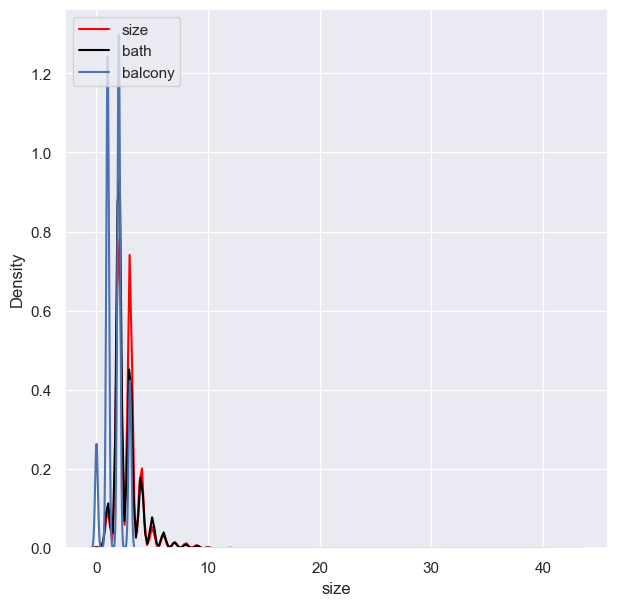

In [74]:
plt.figure(figsize=(7,7))
sns.kdeplot(data["size"], color="red", label="size"),
sns.kdeplot(data["bath"], color="black",label="bath"),
sns.kdeplot(data["balcony"],label="balcony")
plt.legend(loc='upper left')

plt.show()

In [75]:
# giving the high probability of 1 room to 4 room and size and bath are directly correlated to each other

<AxesSubplot:xlabel='size', ylabel='total_sqft'>

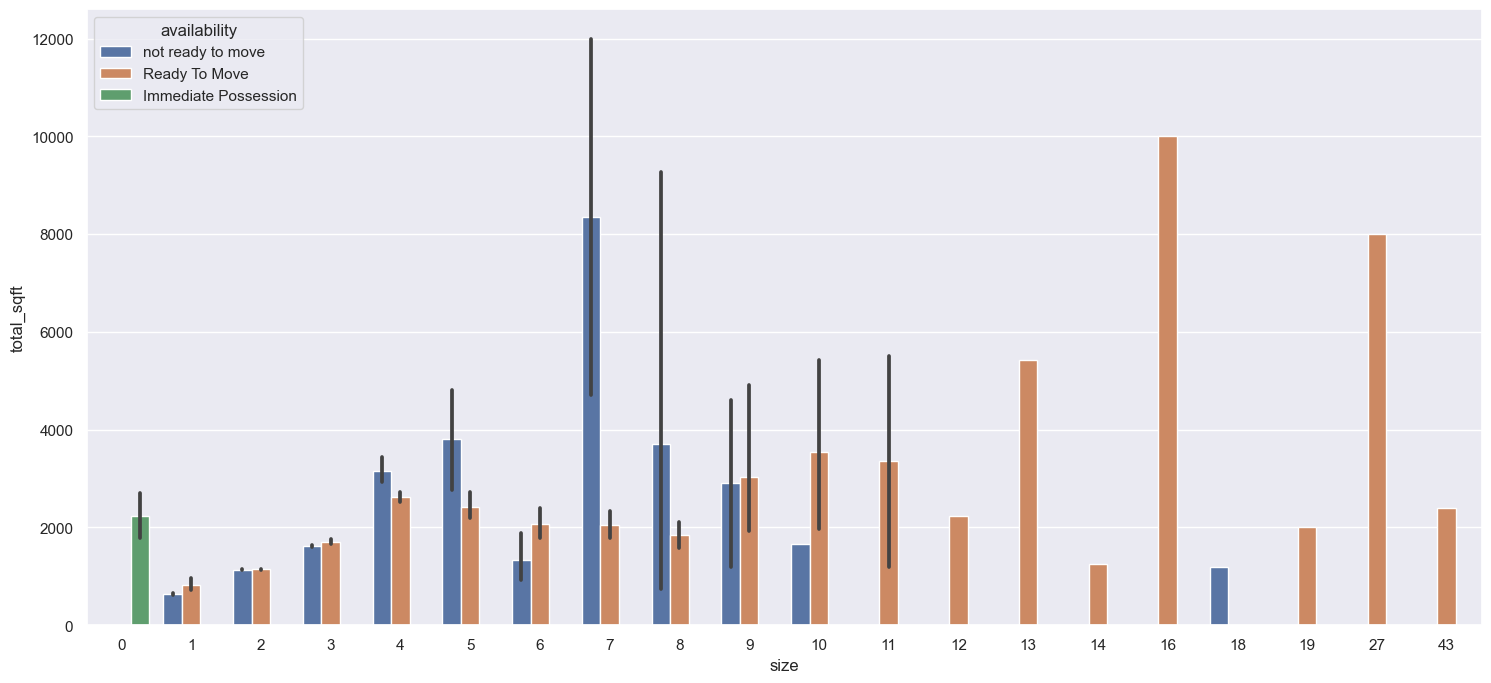

In [76]:
plt.figure(figsize=(18,8))
sns.barplot(x= data["size"], y=data["total_sqft"], hue=data["availability"])

In [77]:
# in the total sqft and size is positive correlated if sqft increase size will be increased

<AxesSubplot:xlabel='size', ylabel='total_sqft'>

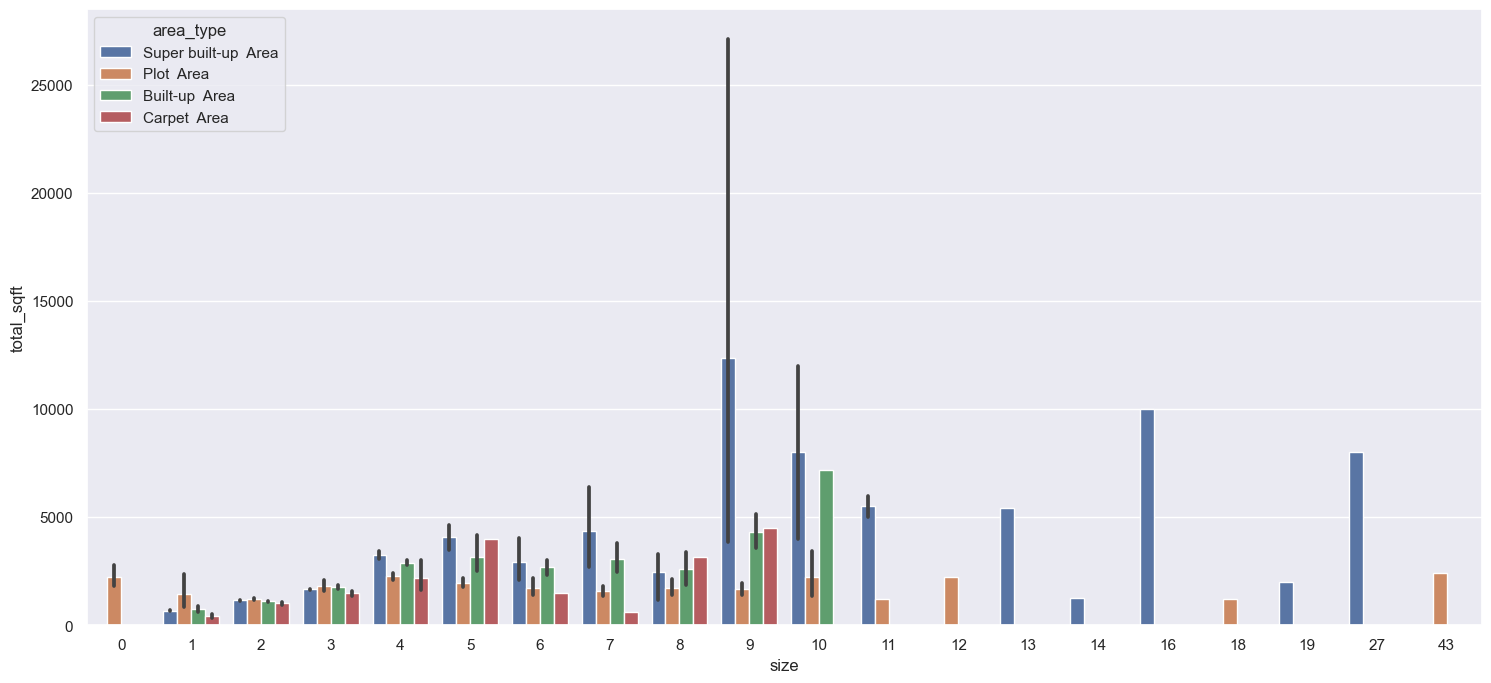

In [78]:
plt.figure(figsize=(18,8))
sns.barplot(x= data["size"], y=data["total_sqft"], hue=data["area_type"])

<AxesSubplot:ylabel='size'>

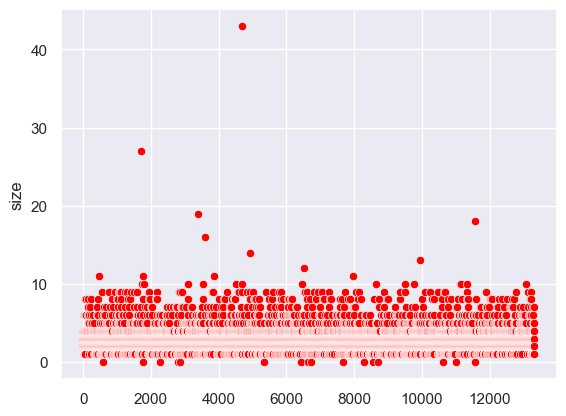

In [79]:
sns.scatterplot(x=data.index, y=data["size"], color= "red")

In [80]:
# mainly data spread  between 0 to 10

<AxesSubplot:ylabel='total_sqft'>

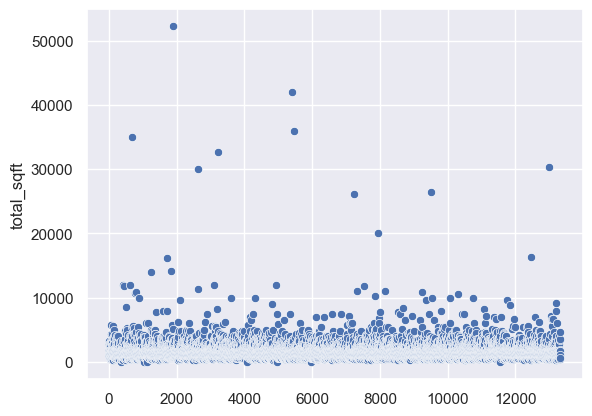

In [81]:
sns.scatterplot(x=data.index, y=data["total_sqft"])

In [82]:
# mostly data spread within the range of 0 to 10k

<AxesSubplot:>

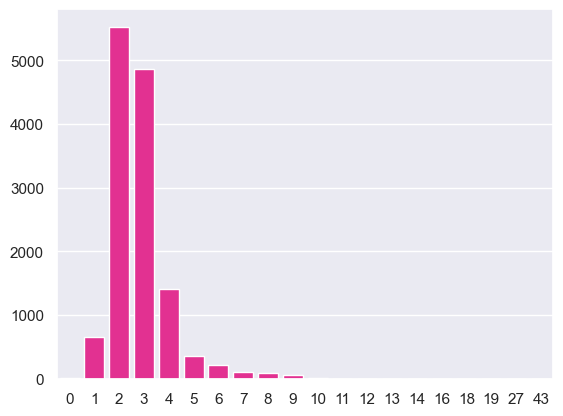

In [83]:
sns.barplot(x= data["size"].value_counts().index, y = data["size"].value_counts().values, color="#FF1493")

In [84]:
# all dataspread within 1 to 10 range

<AxesSubplot:xlabel='location', ylabel='Count'>

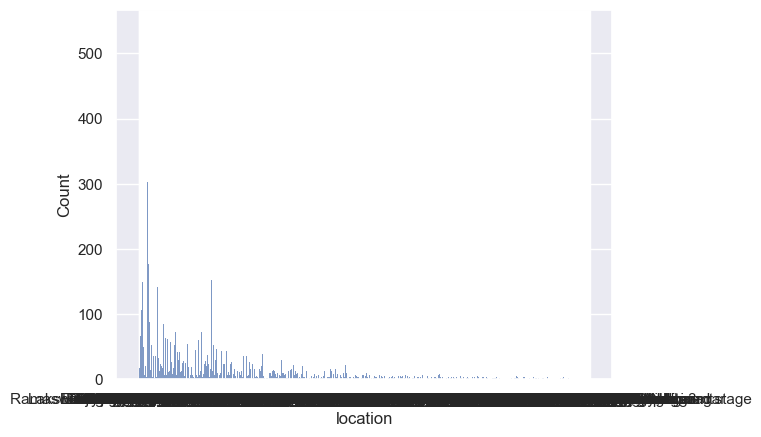

In [85]:
sns.histplot(data["location"])

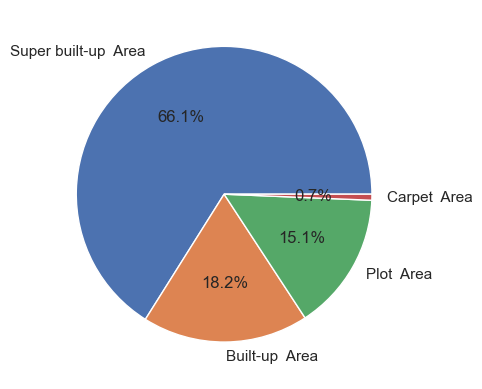

In [86]:
area_type_counts = data["area_type"].value_counts()

plt.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='size', ylabel='Density'>

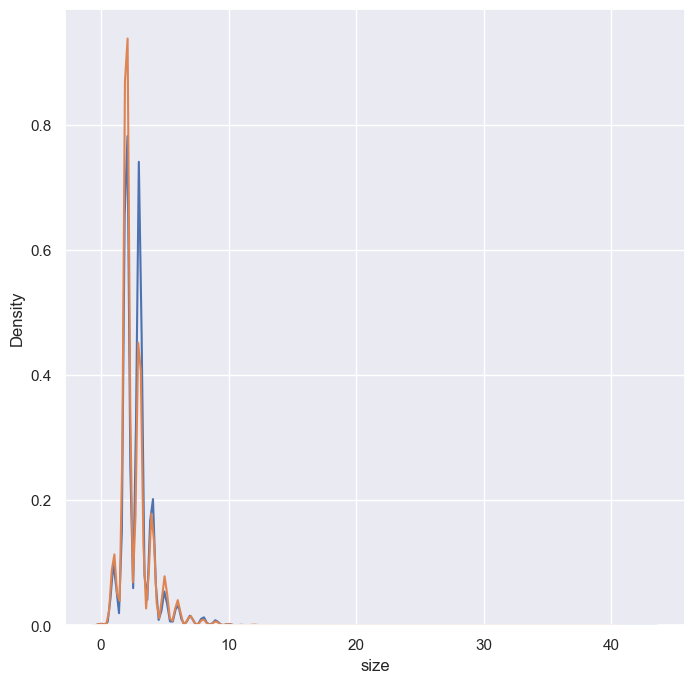

In [87]:
plt.figure(figsize=(8,8))
sns.kdeplot(data["size"]),
sns.kdeplot(data["bath"])

<AxesSubplot:xlabel='availability', ylabel='total_sqft'>

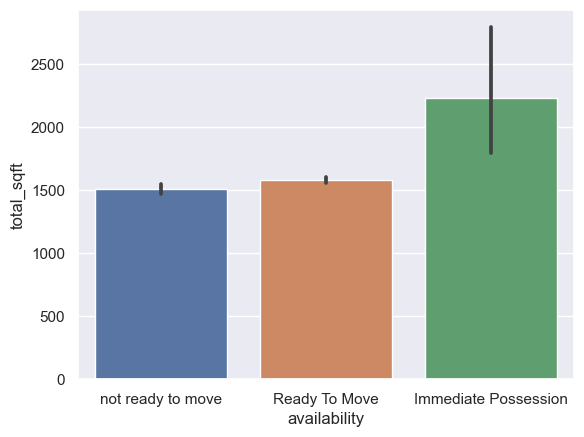

In [88]:
sns.barplot(data["availability"], data["total_sqft"])

In [89]:
# Mostly data follow immediate possession where data have plot area

<AxesSubplot:xlabel='area_type', ylabel='total_sqft'>

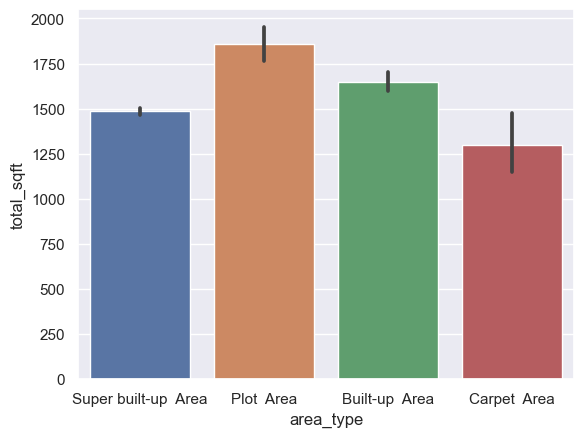

In [90]:
sns.barplot(data["area_type"], data["total_sqft"])

<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

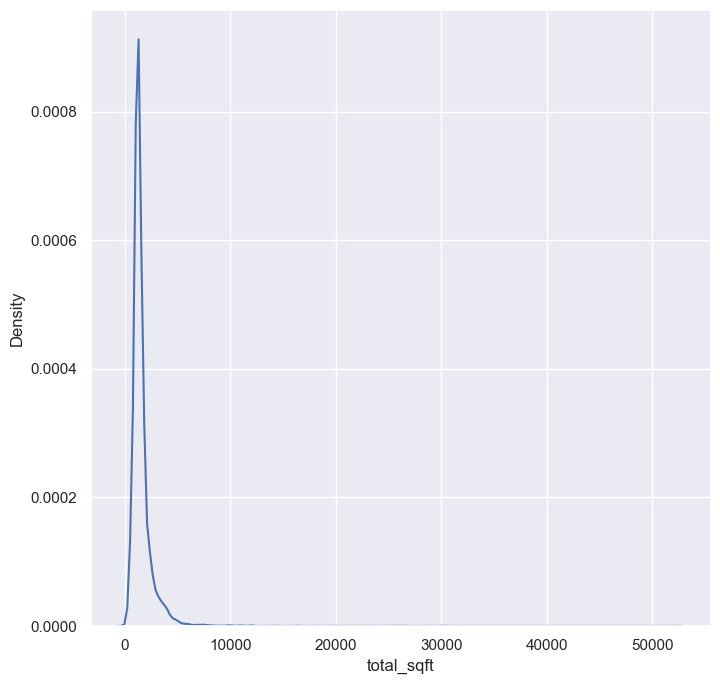

In [91]:
plt.figure(figsize=(8,8))
sns.kdeplot(data["total_sqft"])

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13306 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13306 non-null  object 
 1   availability  13306 non-null  object 
 2   location      13305 non-null  object 
 3   size          13306 non-null  int32  
 4   society       7817 non-null   object 
 5   total_sqft    13306 non-null  float64
 6   bath          13249 non-null  float64
 7   balcony       12714 non-null  float64
 8   price         13306 non-null  object 
dtypes: float64(3), int32(1), object(5)
memory usage: 1.5+ MB


In [93]:
data.select_dtypes("O").describe()

,area_type,availability,location,society,price
count,13306,13306,13305,7817,13306
unique,4,3,1300,2688,2205
top,Super built-up Area,Ready To Move,Whitefield,GrrvaGr,75
freq,8790,10569,540,80,302


# Price

In [94]:
data["price"].unique()

array([' $39.07 ', ' $120.00 ', ' $62.00 ', ..., '40.14', '231', '488'],
      dtype=object)

In [95]:
data["price"].value_counts()

75            302
65            290
55            270
60            261
45            237
50            231
70            202
85            199
90            197
80            182
110           175
150           174
95            174
100           171
40            165
120           164
125           154
130           134
58            131
35            122
42            122
48            120
56            118
46            116
52            114
115           113
140           109
68            109
160           105
62            101
200            99
78             87
57             83
47             82
72             82
135            81
180            80
105            80
44             79
300            70
250            70
38             69
53             68
67             66
69             65
59             65
88             65
170            64
39             64
36             61
54             60
145            60
240            60
66             60
49             60
175       

In [96]:
# finding special character in the price column

special_characters = set()
for value in data["price"]:
    for char in value:
        if not char.isalnum() and char != ' ':
            special_characters.add(char)

print("Special characters in 'your_column':", special_characters)

Special characters in 'your_column': {'$', '.', '\x80', '?', '-'}


In [97]:
data['price'].items

<bound method Series.items of 0          $39.07 
1         $120.00 
2          $62.00 
3          $95.00 
4          $51.00 
           ...    
13315          231
13316          400
13317           60
13318          488
13319           17
Name: price, Length: 13306, dtype: object>

In [98]:
rows_with_special_price = pd.DataFrame(columns=data.columns)

# find those rows which have  $ sign values
for index, value in data['price'].items():
    if '$' in value:
        rows_with_special_price = rows_with_special_price.append(data.iloc[index])

# Print the selected rows
rows_with_special_price.head(50)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,not ready to move,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,$51.00
5,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,$38.00
6,Super built-up Area,not ready to move,Old Airport Road,4,Jaades,2732.0,4.0,NaN,$204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,Brway G,3300.0,4.0,NaN,$600.00
8,Super built-up Area,Ready To Move,Marathahalli,3,NaN,1310.0,3.0,1.0,$63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6,NaN,1020.0,6.0,NaN,$370.00


In [99]:
rows_with_special_price = pd.DataFrame(columns=data.columns)

# find those rows where we have range
for index, value in data['price'].items():
    if "-" in value:
        rows_with_special_price = rows_with_special_price.append(data.iloc[index])

# Print the selected rows
rows_with_special_price.head(50)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
14,Plot Area,Ready To Move,Sarjapur,3,Skityer,2250.0,3.0,2.0,148-150
24,Super built-up Area,not ready to move,Thanisandra,1,Bhe 2ko,510.0,1.0,0.0,25.25-30
121,Super built-up Area,Ready To Move,Akshaya Nagar,3,HiahsLa,2061.0,3.0,1.0,200-250


In [100]:
rows_with_special_price = pd.DataFrame(columns=data.columns)

# find those rows where we have  ? sign values

for index, value in data['price'].items():
    if "?" in value:
        rows_with_special_price = rows_with_special_price.append(data.iloc[index])

# Print the selected rows
rows_with_special_price.head(50)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
80,Super built-up Area,Ready To Move,Kodanda Reddy Layout,3,AdentEl,1660.0,2.0,2.0,? 105.00
81,Built-up Area,not ready to move,Hennur Road,4,Gollela,3203.5,NaN,NaN,? 224.50
82,Super built-up Area,not ready to move,Yelahanka,2,Niareum,1326.0,2.0,2.0,? 78.00
83,Super built-up Area,Ready To Move,Garudachar Palya,3,NaN,1325.0,2.0,2.0,? 60.80
84,Super built-up Area,Ready To Move,EPIP Zone,3,SJlynro,1499.0,5.0,2.0,? 102.00
85,Built-up Area,Ready To Move,Hegde Nagar,6,NaN,3000.0,7.0,2.0,? 210.00
86,Super built-up Area,Ready To Move,Kanakpura Road,3,NaN,1665.0,3.0,2.0,? 88.00
87,Super built-up Area,not ready to move,Dasanapura,2,Tavenew,708.0,2.0,2.0,? 37.00
88,Super built-up Area,Ready To Move,Kasavanhalli,2,Srire S,1060.0,2.0,2.0,? 58.06
89,Plot Area,Ready To Move,Rajaji Nagar,6,NaN,710.0,6.0,3.0,? 160.00


In [101]:
# find the avg of range values

data["price"] =data["price"].apply(lambda x : (float(x.split("-")[0]) + float(x.split("-")[1]))/2 if "-" in x else x)

In [102]:
# remove special sign in front of values

data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace('?', '')

In [103]:
unique_prices = data['price'].unique().tolist()
print(unique_prices)

[' 39.07 ', ' 120.00 ', ' 62.00 ', ' 95.00 ', ' 51.00 ', ' 38.00 ', ' 204.00 ', ' 600.00 ', ' 63.25 ', ' 370.00 ', ' 70.00 ', ' 295.00 ', ' 40.00 ', nan, ' 73.50 ', ' 48.00 ', ' 60.00 ', ' 290.00 ', ' 15.00 ', ' 122.00 ', ' 380.00 ', ' 103.00 ', '56', '23.1', '81', '48.77', '47', '186', '35', '123', '57.39', '125', '36', '45.5', '56.12', '45', '38', '48', '91.79', '200', '33', '94.82', '130', '50', '99', '91', '75', '44', '192', '185', '150', '240', '55', '650', '140', '62', '43', '57', '85', '36.68', '100', '80.58', '101', '70', '48.23', '40', '205', '22', '250', '  105.00 ', '  224.50 ', '  78.00 ', '  60.80 ', '  102.00 ', '  210.00 ', '  88.00 ', '  37.00 ', '  58.06 ', '  160.00 ', '  70.00 ', '  28.88 ', '  155.00 ', '  80.00 ', '  90.00 ', '  245.00 ', '  48.00 ', '  65.00 ', '  138.00 ', '  17.00 ', '  150.00 ', '  43.00 ', '  50.00 ', '  49.90 ', '  98.00 ', '  229.00 ', '  55.68 ', '  66.78 ', '  120.00 ', '  75.00 ', '  51.91 ', '  45.90 ', '  225.00 ', '  140.00 ', '  64.00

In [104]:
data["price"] = data["price"].str.replace('\x80', '')

In [105]:
data["price"] = data["price"].str.strip()

In [106]:
unique_prices = data['price'].unique().tolist()
print(unique_prices)

['39.07', '120.00', '62.00', '95.00', '51.00', '38.00', '204.00', '600.00', '63.25', '370.00', '70.00', '295.00', '40.00', nan, '73.50', '48.00', '60.00', '290.00', '15.00', '122.00', '380.00', '103.00', '56', '23.1', '81', '48.77', '47', '186', '35', '123', '57.39', '125', '36', '45.5', '56.12', '45', '38', '48', '91.79', '200', '33', '94.82', '130', '50', '99', '91', '75', '44', '192', '185', '150', '240', '55', '650', '140', '62', '43', '57', '85', '36.68', '100', '80.58', '101', '70', '48.23', '40', '205', '22', '250', '105.00', '224.50', '78.00', '60.80', '102.00', '210.00', '88.00', '37.00', '58.06', '160.00', '28.88', '155.00', '80.00', '90.00', '245.00', '65.00', '138.00', '17.00', '150.00', '43.00', '50.00', '49.90', '98.00', '229.00', '55.68', '66.78', '75.00', '51.91', '45.90', '225.00', '140.00', '64.00', '74.75', '23.00', '477.00', '68.52', '34.00', '54.00', '115.00', '110.00', '16.50', '83.00', '57.00', '54.01', '50.40', '85.05', '250.00', '213.00', '43.76', '35.00', '46.

In [107]:
data["price"].value_counts()

75         302
65         290
55         270
60         261
45         237
50         231
70         202
85         199
90         197
80         182
110        175
95         174
150        174
100        171
40         165
120        164
125        154
130        134
58         131
35         122
42         122
48         120
56         118
46         116
52         114
115        113
140        109
68         109
160        105
62         101
200         99
78          87
57          83
47          82
72          82
135         81
105         80
180         80
44          79
300         70
250         70
38          69
53          68
67          66
59          65
88          65
69          65
170         64
39          64
36          61
240         60
54          60
145         60
66          60
49          60
175         58
63          55
41          55
30          53
32          53
43          52
82          50
98          50
73          50
25          46
220         45
37        

In [108]:
data["price"]=data["price"].astype(float)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13306 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13306 non-null  object 
 1   availability  13306 non-null  object 
 2   location      13305 non-null  object 
 3   size          13306 non-null  int32  
 4   society       7817 non-null   object 
 5   total_sqft    13306 non-null  float64
 6   bath          13249 non-null  float64
 7   balcony       12714 non-null  float64
 8   price         13303 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 1.5+ MB


In [110]:
data.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5489
total_sqft         0
bath              57
balcony          592
price              3
dtype: int64

In [111]:
 data[data["price"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
14,Plot Area,Ready To Move,Sarjapur,3,Skityer,2250.0,3.0,2.0,NaN
24,Super built-up Area,not ready to move,Thanisandra,1,Bhe 2ko,510.0,1.0,0.0,NaN
121,Super built-up Area,Ready To Move,Akshaya Nagar,3,HiahsLa,2061.0,3.0,1.0,NaN


In [112]:
d55ata = data[data["price"] == 0]
d55ata

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [113]:
data.shape

(13306, 9)

In [114]:
data = data[(data["price"] != 0) & (~data["price"].isna())]

In [115]:
data.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5489
total_sqft         0
bath              57
balcony          592
price              0
dtype: int64

In [116]:
data.shape

(13303, 9)

In [117]:
data.select_dtypes("O").describe()

,area_type,availability,location,society
count,13303,13303,13302,7814
unique,4,3,1300,2687
top,Super built-up Area,Ready To Move,Whitefield,GrrvaGr
freq,8788,10567,540,80


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13302 non-null  object 
 3   size          13303 non-null  int32  
 4   society       7814 non-null   object 
 5   total_sqft    13303 non-null  float64
 6   bath          13246 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13303 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 987.3+ KB


In [119]:
data[data["bath"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,not ready to move,Devanahalli,4,BrereAt,3210.0,NaN,NaN,192.000
81,Built-up Area,not ready to move,Hennur Road,4,Gollela,3203.5,NaN,NaN,224.500
224,Super built-up Area,not ready to move,Devanahalli,3,Jurdsig,1630.0,NaN,NaN,74.820
344,Super built-up Area,not ready to move,Kanakpura Road,1,PrarePa,525.0,NaN,NaN,21.530
669,Super built-up Area,not ready to move,JP Nagar,5,Pehtsa,5520.0,NaN,NaN,375.000
702,Super built-up Area,not ready to move,JP Nagar,5,Pehtsa,5600.0,NaN,NaN,548.500
801,Super built-up Area,not ready to move,JP Nagar,4,Pehtsa,4624.5,NaN,NaN,453.000
941,Super built-up Area,Ready To Move,Whitefield,4,PrOakSi,4348.5,NaN,NaN,304.000
1264,Built-up Area,not ready to move,Hennur,3,Asoilul,2264.0,NaN,NaN,155.000
1267,Super built-up Area,not ready to move,Yelahanka,3,Shalkri,1662.0,NaN,NaN,67.980


# Missing value treatment

In [120]:
data.describe()

,size,total_sqft,bath,balcony,price
count,13303.000000,13303.000000,13246.000000,12711.000000,13303.000000
mean,2.800045,1568.792116,2.689038,1.583117,115.596437
std,1.295706,1305.526908,1.342179,0.818162,394.697224
min,0.000000,1.000000,0.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1276.000000,2.000000,2.000000,72.000000
75%,3.000000,1680.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,42278.000000


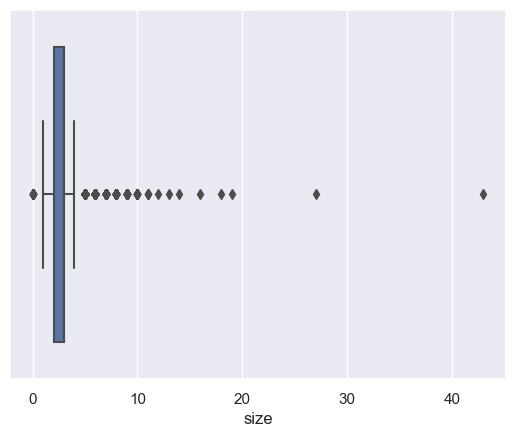

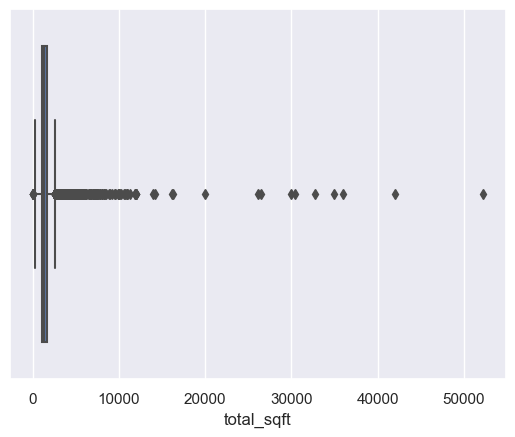

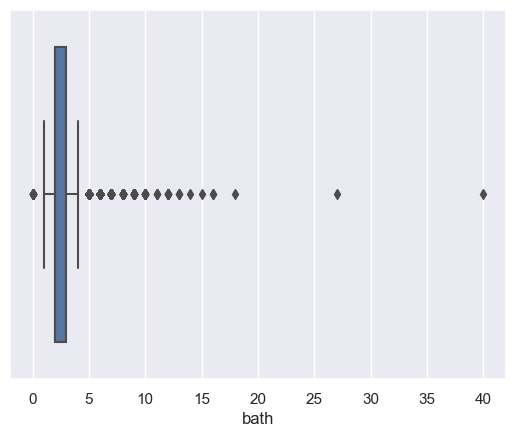

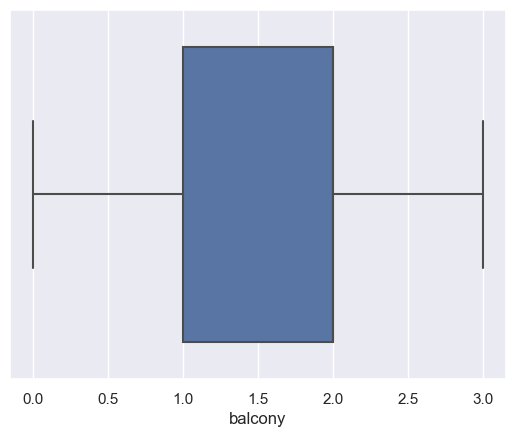

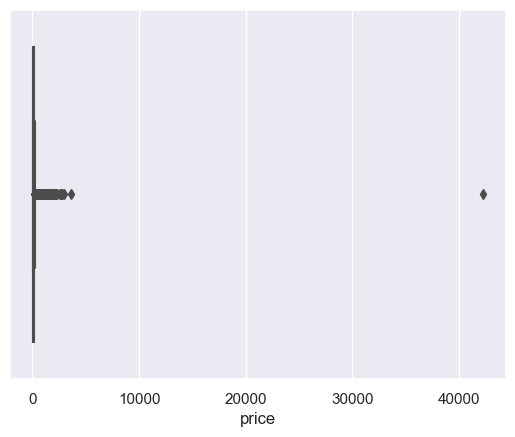

In [121]:
# checking outlier in the column for filling missing values

for i in data.select_dtypes(exclude = "O"):
    sns.boxplot(data[i])
    plt.show()
    

In [122]:
data[["bath", "balcony"]]= data[["bath", "balcony"]].fillna(data[["bath", "balcony"]].median())

In [123]:
data["balcony"].value_counts()

2.0    5700
1.0    4894
3.0    1671
0.0    1038
Name: balcony, dtype: int64

In [124]:
data[data["bath"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [125]:
data.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5489
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

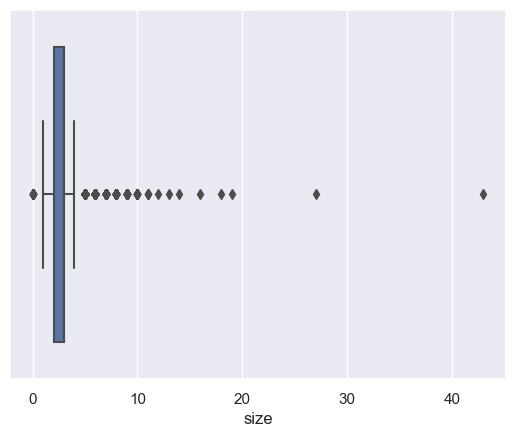

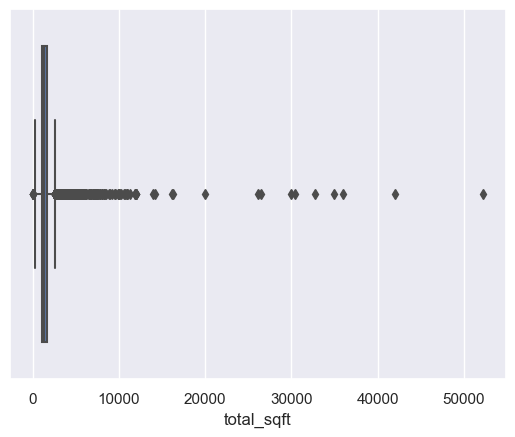

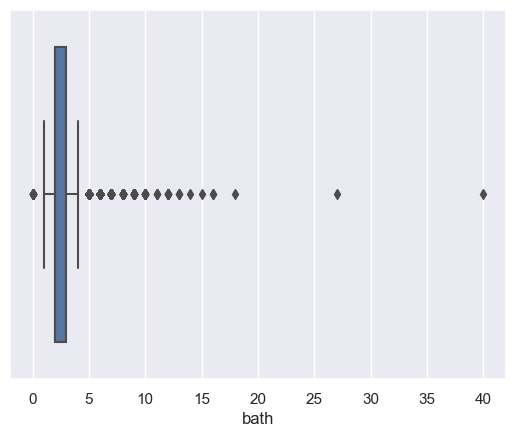

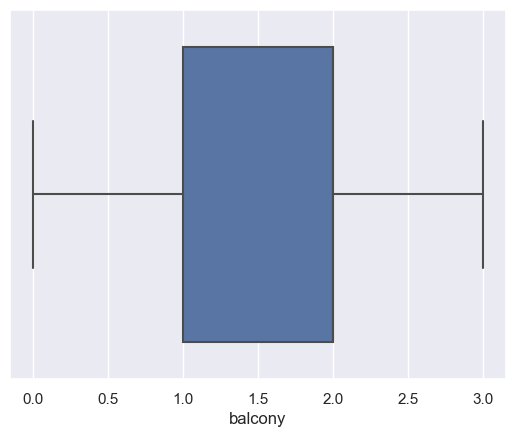

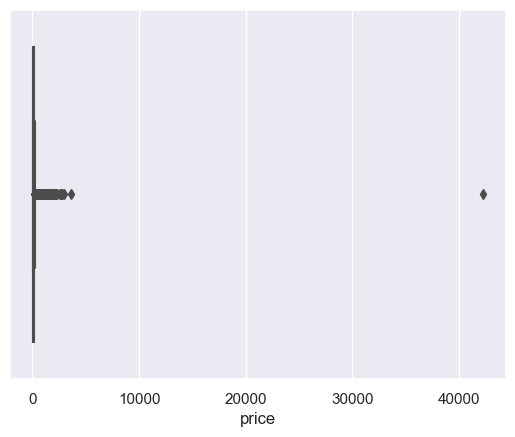

In [126]:
for i in data.select_dtypes(exclude = "O"):
    sns.boxplot(data[i])
    plt.show()

In [127]:
data.describe()

,size,total_sqft,bath,balcony,price
count,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000
mean,2.800045,1568.792116,2.686086,1.601669,115.596437
std,1.295706,1305.526908,1.340057,0.804356,394.697224
min,0.000000,1.000000,0.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1276.000000,2.000000,2.000000,72.000000
75%,3.000000,1680.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,42278.000000


In [128]:
df.loc[df["availability"] == 'Immediate Possession', "size"] = 0

In [129]:
# maximum value in the price column

In [130]:
pp = data.loc[data["price"] == 42278]
pp

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1311,Super built-up Area,Ready To Move,D Souza Layout,3,Niateki,4634.0,4.0,3.0,42278.0


In [131]:
data.shape

(13303, 9)

In [132]:
# drop that row where max value have

data= data[data["price"] != 42278]

In [133]:
data.shape

(13302, 9)

In [134]:
# find more than 1000


data[data["price"] > 1000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
408,Super built-up Area,not ready to move,Rajaji Nagar,7,NaN,12000.0,6.0,3.0,2200.0
605,Super built-up Area,not ready to move,Malleshwaram,7,NaN,12000.0,7.0,3.0,2200.0
743,Super built-up Area,Ready To Move,Cunningham Road,4,NaN,5270.0,4.0,3.0,1250.0
1299,Plot Area,Ready To Move,Chamrajpet,9,NaN,4050.0,7.0,1.0,1200.0
1873,Plot Area,Ready To Move,Kasavanhalli,5,NaN,5800.0,7.0,2.0,1200.0
2286,Plot Area,Ready To Move,Kathreguppe,4,NaN,3200.0,4.0,2.0,1200.0
2623,Plot Area,not ready to move,Dodsworth Layout,4,NaN,30000.0,4.0,2.0,2100.0
3164,Plot Area,Ready To Move,Malleshwaram,4,NaN,5500.0,5.0,1.0,1500.0
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5,Kierser,8321.0,5.0,3.0,2700.0
4162,Built-up Area,Ready To Move,Yemlur,4,Epllan,7000.0,5.0,2.0,2050.0


In [135]:
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 2500)
pd.set_option('display.width', 2500)

In [136]:
# find less than 1000
jd = data[data["price"] <= 1000]
sorted_unique_prices = jd["price"].unique().tolist()
sorted_unique_prices.sort()
print(sorted_unique_prices)

[8.0, 8.44, 9.0, 10.0, 10.25, 10.5, 11.0, 11.5, 11.66, 12.0, 12.5, 12.75, 13.0, 13.26, 13.31, 13.5, 13.57, 13.86, 14.0, 14.04, 15.0, 15.135, 15.5, 16.0, 16.45, 16.5, 16.6, 16.75, 16.9, 17.0, 17.09, 17.19, 17.5, 17.535, 17.835, 18.0, 18.41, 18.5, 19.0, 19.33, 19.4, 19.5, 19.55, 19.65, 19.695, 19.8, 19.82, 19.83, 19.87, 19.9, 20.0, 20.03, 20.5, 21.0, 21.28, 21.5, 21.53, 22.0, 22.14, 22.34, 22.49, 22.5, 22.8, 22.89, 23.0, 23.1, 23.45, 23.5, 23.65, 24.0, 24.5, 24.55, 24.8, 24.86, 24.88, 24.9, 24.95, 25.0, 25.12, 25.25, 25.26, 25.29, 25.38, 25.4, 25.49, 25.5, 25.53, 25.65, 25.75, 25.79, 25.84, 25.88, 25.99, 26.0, 26.01, 26.25, 26.49, 26.5, 26.63, 26.65, 26.73, 26.85, 26.9, 26.91, 27.0, 27.24, 27.25, 27.375, 27.43, 27.5, 27.54, 27.565, 27.6, 27.68, 27.98, 28.0, 28.095, 28.13, 28.15, 28.18, 28.275, 28.29, 28.32, 28.34, 28.35, 28.41, 28.47, 28.5, 28.545, 28.57, 28.585, 28.785, 28.88, 28.93, 29.0, 29.25, 29.35, 29.38, 29.44, 29.45, 29.46, 29.47, 29.5, 29.6, 29.61, 29.7, 29.9, 29.95, 29.97, 29.9

In [137]:
data.describe()

,size,total_sqft,bath,balcony,price
count,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000
mean,2.800030,1568.561684,2.685987,1.601564,112.426808
std,1.295754,1305.305413,1.340059,0.804295,148.789596
min,0.000000,1.000000,0.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1276.000000,2.000000,2.000000,72.000000
75%,3.000000,1680.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,3600.000000


In [138]:
# data only have less than 1000 in price column

data = data[data["price"] <= 1000]

In [139]:
data.shape

(13258, 9)

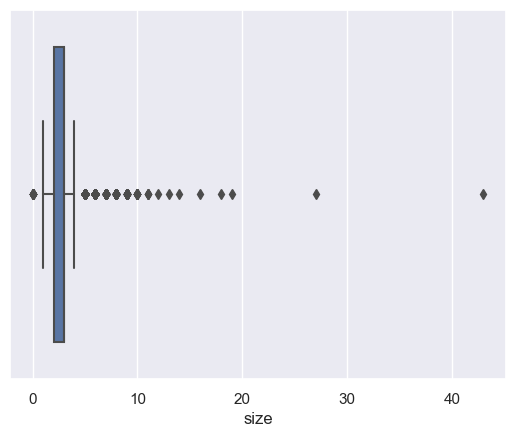

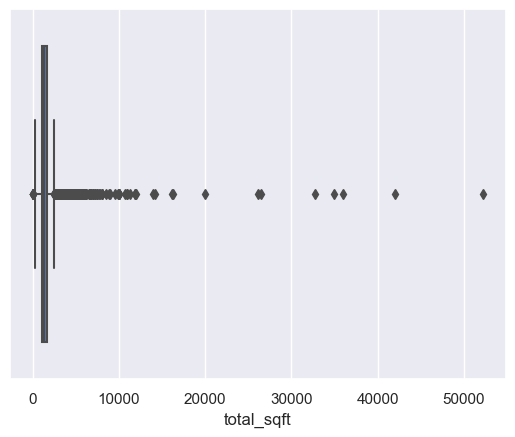

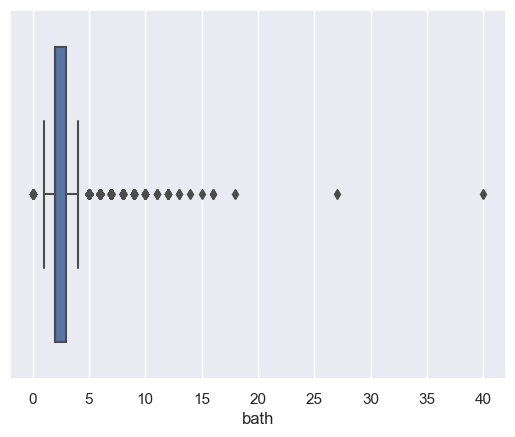

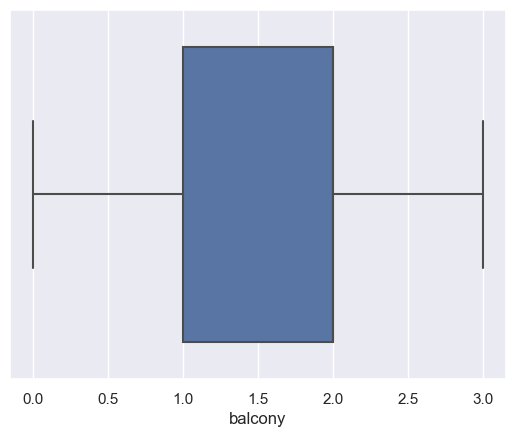

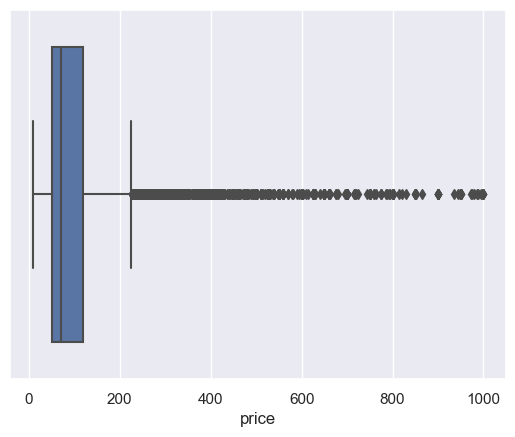

In [140]:
for i in data.select_dtypes(exclude = "O"):
    sns.boxplot(data[i])
    plt.show()

In [141]:
data.describe()

,size,total_sqft,bath,balcony,price
count,13258.000000,13258.000000,13258.000000,13258.000000,13258.000000
mean,2.793559,1546.681439,2.677025,1.600015,106.770659
std,1.290380,1210.062993,1.328999,0.804485,106.872765
min,0.000000,1.000000,0.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1275.000000,2.000000,2.000000,71.500000
75%,3.000000,1672.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,1000.000000


In [142]:
data.shape

(13258, 9)

In [143]:
# data = data[data["total_sqft"] < 10000]

# filling outlier

In [144]:
# q1 = data["total_sqft"].quantile(0.25)
# q3 = data["total_sqft"].quantile(0.75)
# iqr = q3-q1
# min1 = q1 - 1.5*iqr
# max1 = q3 +1.5*iqr

In [145]:
# print(min1)  242.0
# print(max1)   2530


In [146]:
# data["total_sqft"] = np.where(data["total_sqft"]> max1, max1, np.where(data["total_sqft"]<min1, min1, data["total_sqft"]))

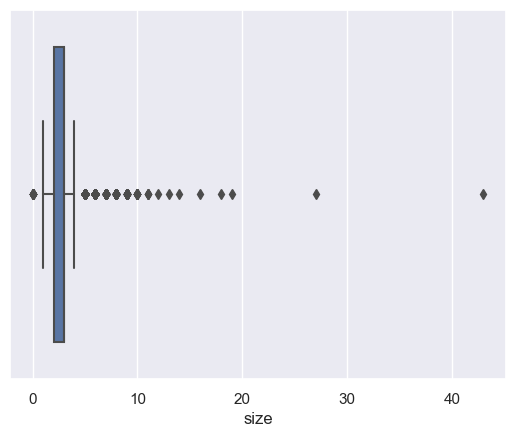

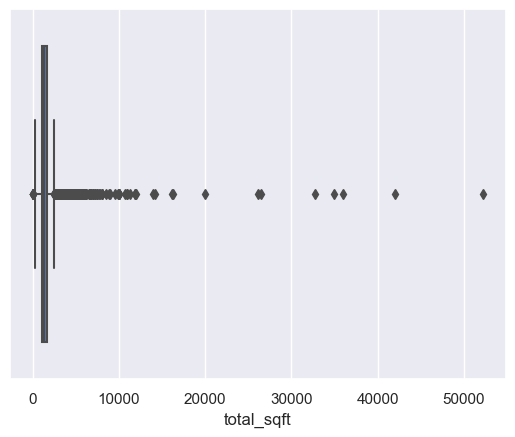

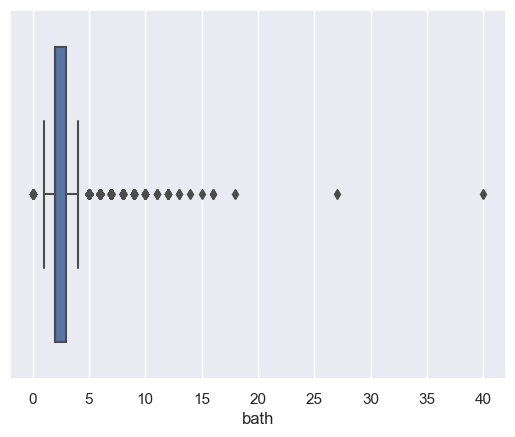

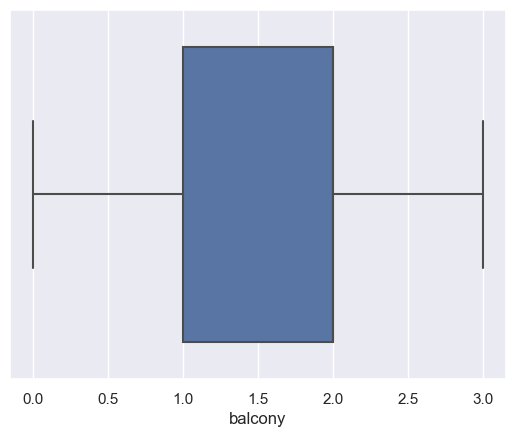

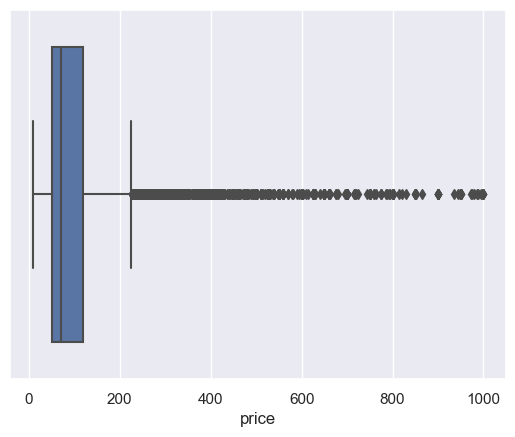

In [147]:
for i in data.select_dtypes(exclude = "O"):
    sns.boxplot(data[i])
    plt.show()

In [148]:
# num_col = data.select_dtypes(exclude = ['object']).columns

In [149]:
# def outlier(data, col):
#     q3=data[col].quantile(0.75)
#     q1=data[col].quantile(0.25)
#     IQR=q3-q1
#     Lower=q1-1.5*IQR
#     Upper=q3+1.5*IQR
#     data[col].clip(Lower,Upper,inplace=True)

In [150]:
# for i in num_col:
#     outlier(data, i)

In [151]:
# def boxplots(col):
#     plt.figure(figsize=(5,4))
#     sns.boxplot(data[col], palette= 'Set2')
#     plt.show()

# for i in list(data.select_dtypes(exclude=['object']).columns)[0:]:
#     boxplots(i)

In [152]:
# sns.boxplot(data["size"])

In [153]:
# q2 = data["bath"].quantile(0.25)
# q4 = data["bath"].quantile(0.75)
# iqr1 = q4-q2
# min2 = q2 - 1.5*iqr
# max2 = q4 +1.5*iqr

In [154]:
# print(min2)
# print(max2)

In [155]:
# data["bath"] = np.where(data["bath"]> max2, max2, np.where(data["bath"]<min2, min2, data["bath"]))

In [156]:
# sns.boxplot(data["bath"])

In [157]:
data.describe()

,size,total_sqft,bath,balcony,price
count,13258.000000,13258.000000,13258.000000,13258.000000,13258.000000
mean,2.793559,1546.681439,2.677025,1.600015,106.770659
std,1.290380,1210.062993,1.328999,0.804485,106.872765
min,0.000000,1.000000,0.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1275.000000,2.000000,2.000000,71.500000
75%,3.000000,1672.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,1000.000000


In [158]:
data["total_sqft"].tolist()

[1056.0,
 2600.0,
 1440.0,
 1521.0,
 1200.0,
 1170.0,
 2732.0,
 3300.0,
 1310.0,
 1020.0,
 1800.0,
 2785.0,
 1000.0,
 1100.0,
 1175.0,
 1180.0,
 1540.0,
 2770.0,
 1100.0,
 600.0,
 1755.0,
 2800.0,
 1767.0,
 1250.0,
 660.0,
 1610.0,
 1151.0,
 1025.0,
 2475.0,
 1075.0,
 1760.0,
 1693.0,
 1925.0,
 700.0,
 1070.0,
 1724.0,
 1290.0,
 1143.0,
 1296.0,
 1254.0,
 600.0,
 660.0,
 1330.74,
 600.0,
 970.0,
 1459.0,
 800.0,
 869.0,
 1270.0,
 1670.0,
 2010.0,
 1185.0,
 1600.0,
 1200.0,
 3210.0,
 1500.0,
 1407.0,
 840.0,
 4395.0,
 845.0,
 5700.0,
 1160.0,
 3000.0,
 1100.0,
 1140.0,
 1220.0,
 1350.0,
 1005.0,
 500.0,
 1358.0,
 1569.0,
 1240.0,
 2089.0,
 1206.0,
 1150.0,
 2511.0,
 460.0,
 4400.0,
 1660.0,
 3203.5,
 1326.0,
 1325.0,
 1499.0,
 3000.0,
 1665.0,
 708.0,
 1060.0,
 710.0,
 1000.0,
 1000.0,
 1450.0,
 1200.0,
 1296.0,
 1540.0,
 2894.0,
 1330.0,
 1200.0,
 1200.0,
 2502.0,
 650.0,
 2400.0,
 1007.0,
 1200.0,
 966.0,
 1630.0,
 1640.0,
 782.0,
 1260.0,
 1800.0,
 1413.0,
 1116.0,
 1530.0,
 3700.0,


In [159]:
# As 1 sq. ft. is equal to 0.11 gaj(52272*0.11 = 5749 gaj)

In [160]:
data.shape

(13258, 9)

In [161]:
data = data[data["total_sqft"] < 10000]

In [162]:
data.shape

(13235, 9)

In [163]:
data[data["total_sqft"] < 9000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,not ready to move,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600.0,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,not ready to move,Padmanabhanagar,4,SollyCl,4689.0,4.0,1.0,488.00


In [164]:
data[data["total_sqft"] == 52272]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [165]:
data[data["price"] == 1000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2400,Plot Area,Ready To Move,Cholanayakanahalli,5,NaN,3000.0,6.0,3.0,1000.0
6457,Plot Area,Ready To Move,BEL Road,5,NaN,4000.0,4.0,2.0,1000.0
9737,Built-up Area,Ready To Move,Ngef Layout,4,NaN,2100.0,3.0,1.0,1000.0


In [166]:
sorted(data["size"].unique().tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 27, 43]

In [167]:
data[(data["size"] == 43) | (data["size"] == 27) |(data["size"] == 19) |(data["size"] == 18) ]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27,NaN,8000.0,27.0,0.0,230.0
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19,NaN,2000.0,16.0,2.0,490.0
4684,Plot Area,Ready To Move,Munnekollal,43,NaN,2400.0,40.0,0.0,660.0
11559,Plot Area,not ready to move,1Kasavanhalli,18,HMwerCo,1200.0,18.0,2.0,200.0


In [168]:
data.describe()   # now  9900*0.11 = 1089 gaj ( As 1 sq. ft. is equal to 0.11 gaj)

,size,total_sqft,bath,balcony,price
count,13235.000000,13235.000000,13235.000000,13235.000000,13235.000000
mean,2.790631,1515.291315,2.673819,1.600227,106.399879
std,1.282543,807.639164,1.319942,0.804429,105.889101
min,0.000000,1.000000,0.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1275.000000,2.000000,2.000000,71.030000
75%,3.000000,1665.000000,3.000000,2.000000,120.000000
max,43.000000,9900.000000,40.000000,3.000000,1000.000000


In [169]:
data.shape

(13235, 9)

In [170]:
data = data[data["size"] < 17]

In [171]:
data.describe() 

,size,total_sqft,bath,balcony,price
count,13231.000000,13231.00000,13231.000000,13231.000000,13231.000000
mean,2.783387,1514.72153,2.666994,1.600408,106.312629
std,1.200629,805.73878,1.249604,0.804295,105.734478
min,0.000000,1.00000,0.000000,0.000000,8.000000
25%,2.000000,1100.00000,2.000000,1.000000,50.000000
50%,3.000000,1274.00000,2.000000,2.000000,71.000000
75%,3.000000,1665.00000,3.000000,2.000000,120.000000
max,14.000000,9900.00000,15.000000,3.000000,1000.000000


In [172]:
data.shape

(13231, 9)

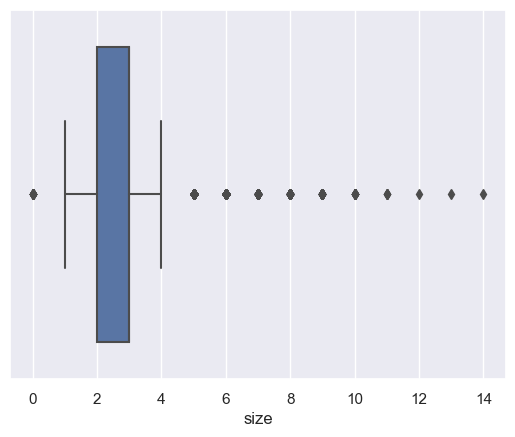

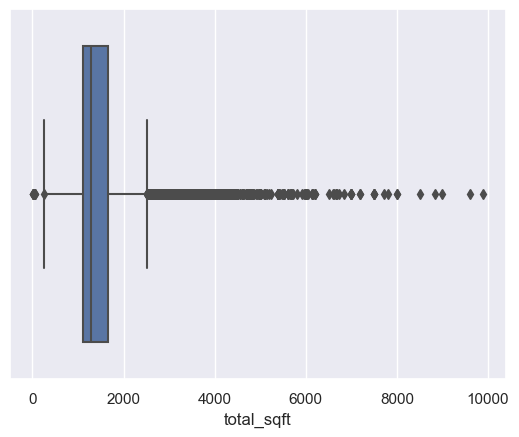

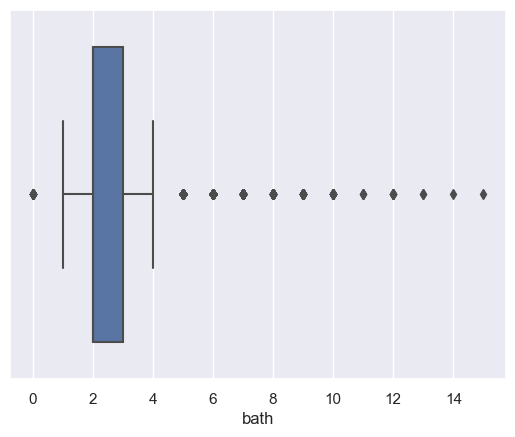

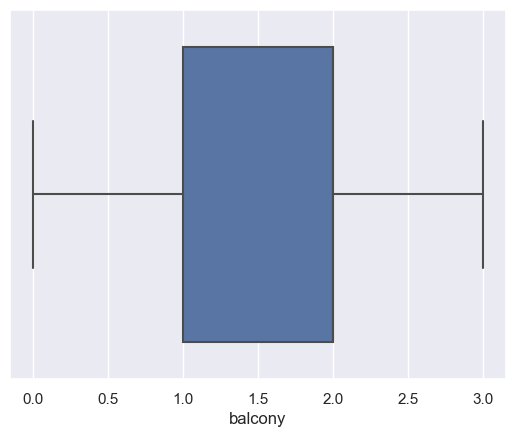

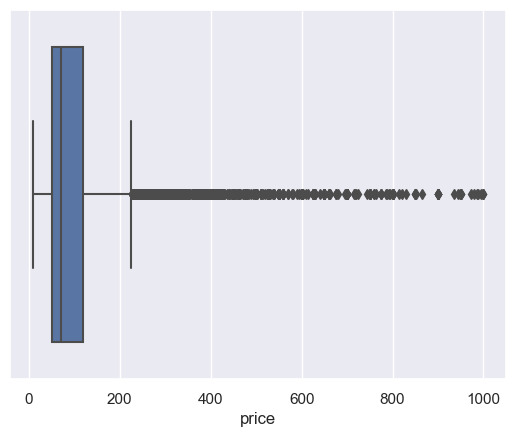

In [173]:
for i in data.select_dtypes(exclude = "O"):
    sns.boxplot(data[i])
    plt.show()

In [174]:
data1 = data.copy()

# location

In [175]:
data1["location"].value_counts()

Whitefield                                            538
Sarjapur  Road                                        398
Electronic City                                       302
Kanakpura Road                                        271
Thanisandra                                           234
Yelahanka                                             211
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     150
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          103
Chandapura                                            100
Bellandur     

In [176]:
# fillim=ng missing value through mode
data1["location"]=data1.location.fillna("Whitefield")

In [177]:
locations=data1['location'].value_counts()
locations

Whitefield                                            539
Sarjapur  Road                                        398
Electronic City                                       302
Kanakpura Road                                        271
Thanisandra                                           234
Yelahanka                                             211
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     150
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          103
Chandapura                                            100
Bellandur     

In [178]:
# checking less than 20 values counts

locations_Less_than_20=locations[locations<=20]

In [179]:
locations_Less_than_20

Poorna Pragna Layout                                  20
Yelachenahalli                                        20
HBR Layout                                            20
Sanjay nagar                                          20
Kalyan nagar                                          19
Pai Layout                                            19
Kaggalipura                                           19
OMBR Layout                                           19
HRBR Layout                                           19
Ulsoor                                                19
Kannamangala                                          18
Garudachar Palya                                      18
Bannerghatta                                          18
Billekahalli                                          18
Malleshpalya                                          17
Kammanahalli                                          17
BTM Layout                                            17
Chikka Tirupathi               

In [180]:
# those are less than 20 just convert onto others

data1['location']=data1['location'].apply(lambda x: "other" if x in locations_Less_than_20 else x)

In [181]:
data1['location'].value_counts()

other                          4258
Whitefield                      539
Sarjapur  Road                  398
Electronic City                 302
Kanakpura Road                  271
Thanisandra                     234
Yelahanka                       211
Uttarahalli                     186
Hebbal                          177
Marathahalli                    175
Raja Rajeshwari Nagar           171
Hennur Road                     152
Bannerghatta Road               150
7th Phase JP Nagar              149
Haralur Road                    142
Electronic City Phase II        132
Rajaji Nagar                    103
Chandapura                      100
Bellandur                        96
KR Puram                         91
Electronics City Phase 1         88
Hoodi                            88
Yeshwanthpur                     85
Begur Road                       84
Sarjapur                         80
Kasavanhalli                     79
Harlur                           79
Banashankari                

In [182]:
data1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,not ready to move,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,other,4,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,51.00


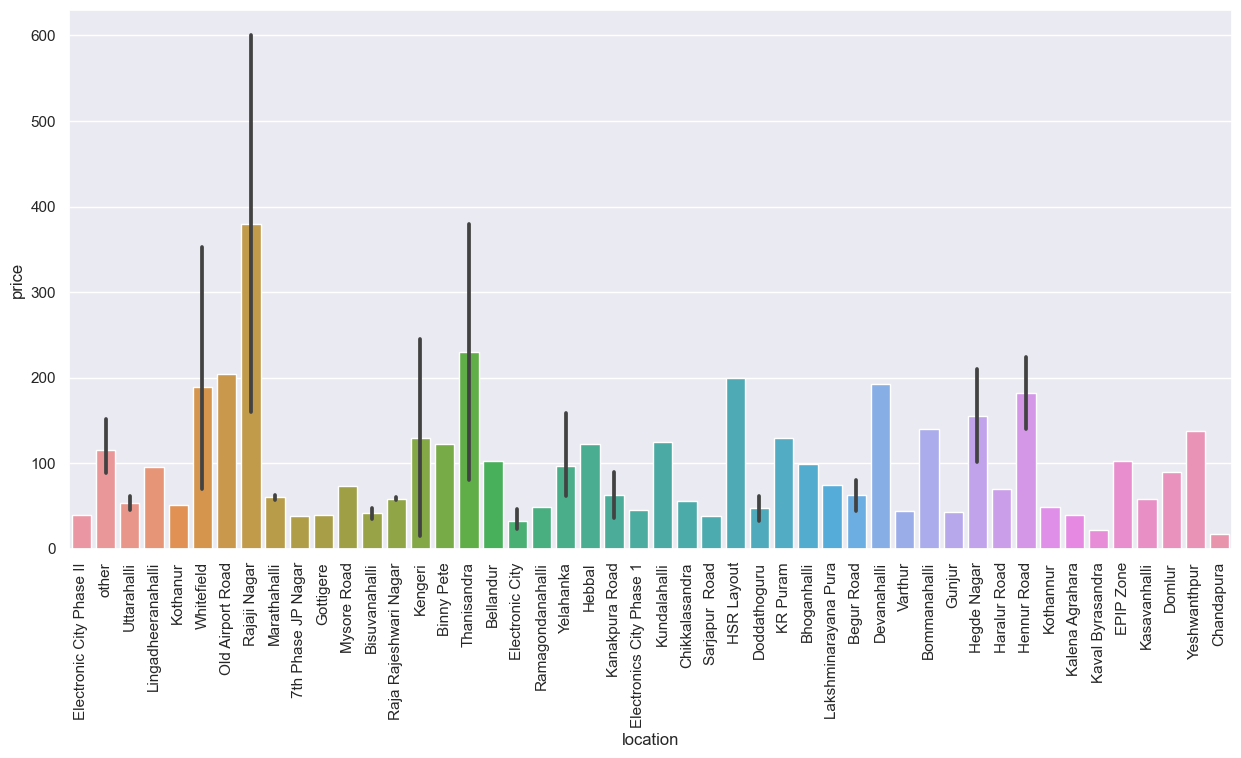

In [183]:
plt.figure(figsize=(15,7))
sns.barplot(data1["location"][:100], data1["price"],)
plt.xticks(rotation=90)
plt.show()

In [184]:
# location is affecting price highest price of rajaji nagar followed by Thanisandra

<AxesSubplot:xlabel='balcony', ylabel='price'>

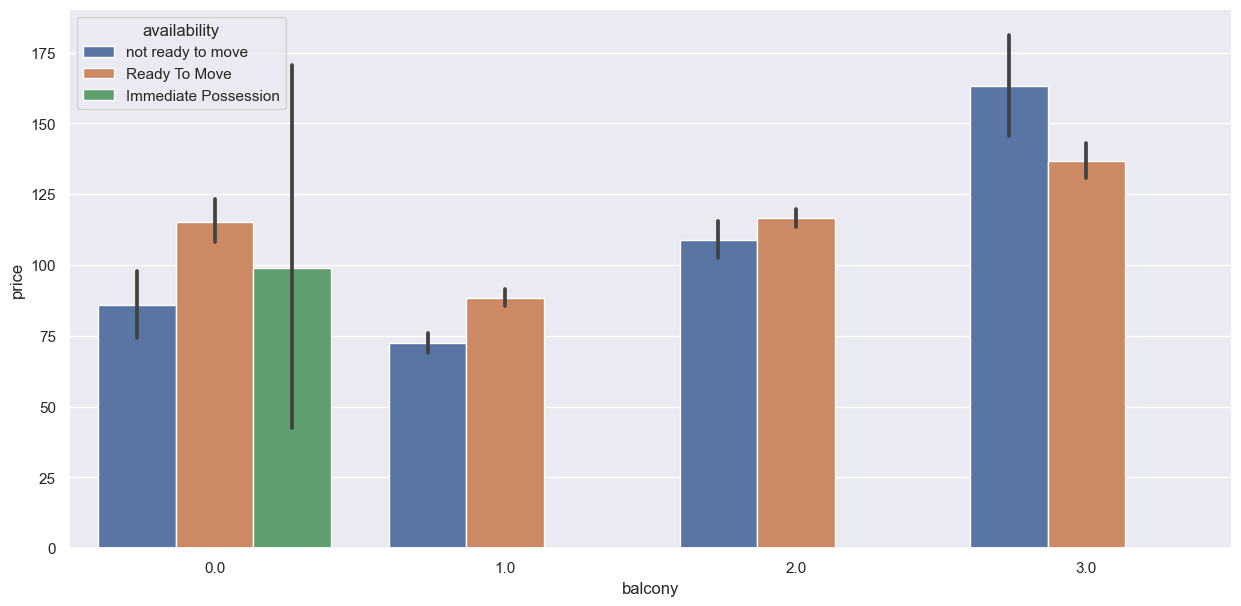

In [185]:
plt.figure(figsize=(15,7))
sns.barplot(data1["balcony"], data1["price"],hue=data1["availability"])

In [186]:
# if balcony is high its means here is so many floor in the house so price is also affected by this

<AxesSubplot:xlabel='bath', ylabel='total_sqft'>

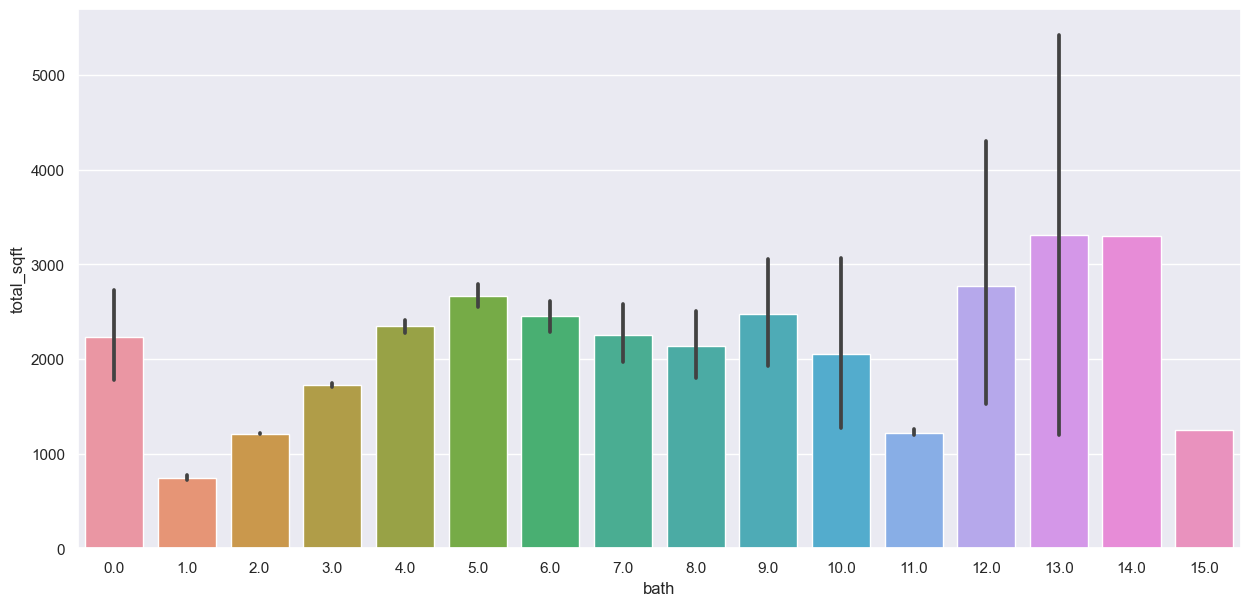

In [187]:
plt.figure(figsize=(15,7))
sns.barplot(data1["bath"], data1["total_sqft"])

<AxesSubplot:xlabel='bath', ylabel='size'>

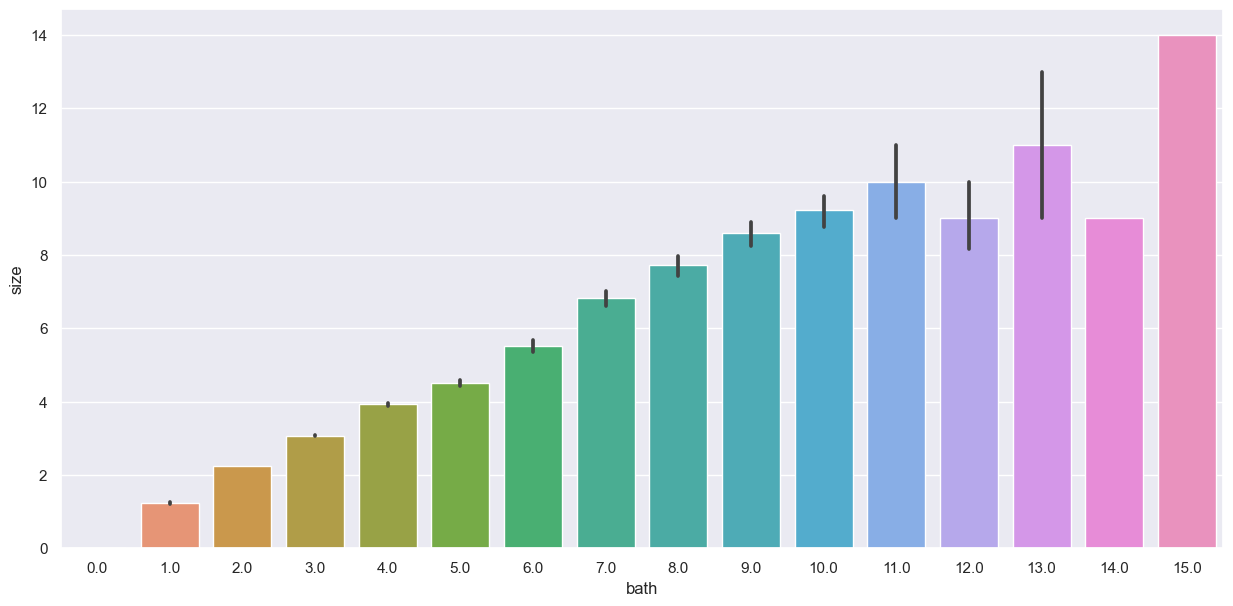

In [188]:
plt.figure(figsize=(15,7))
sns.barplot(data1["bath"], data1["size"])

<AxesSubplot:xlabel='bath', ylabel='price'>

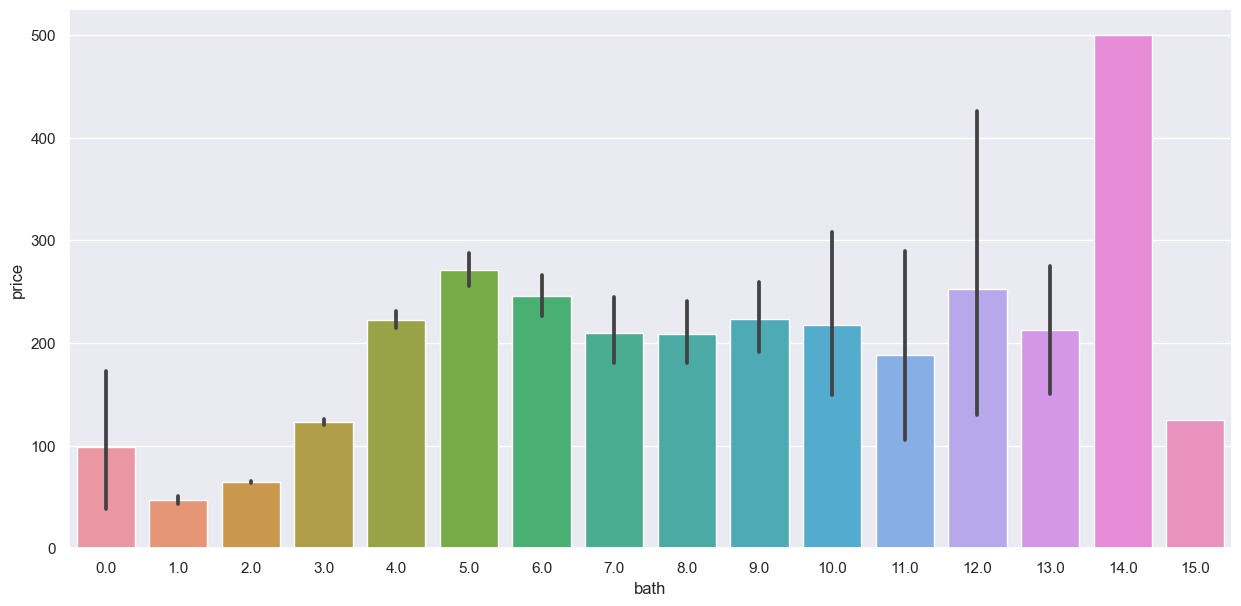

In [189]:
plt.figure(figsize=(15,7))
sns.barplot(data1["bath"], data1["price"])

### as bath and size is increase simultaniously price is also increase but and the bath 15 is increased byt the price is low bkz in it area is also small

<AxesSubplot:xlabel='availability', ylabel='price'>

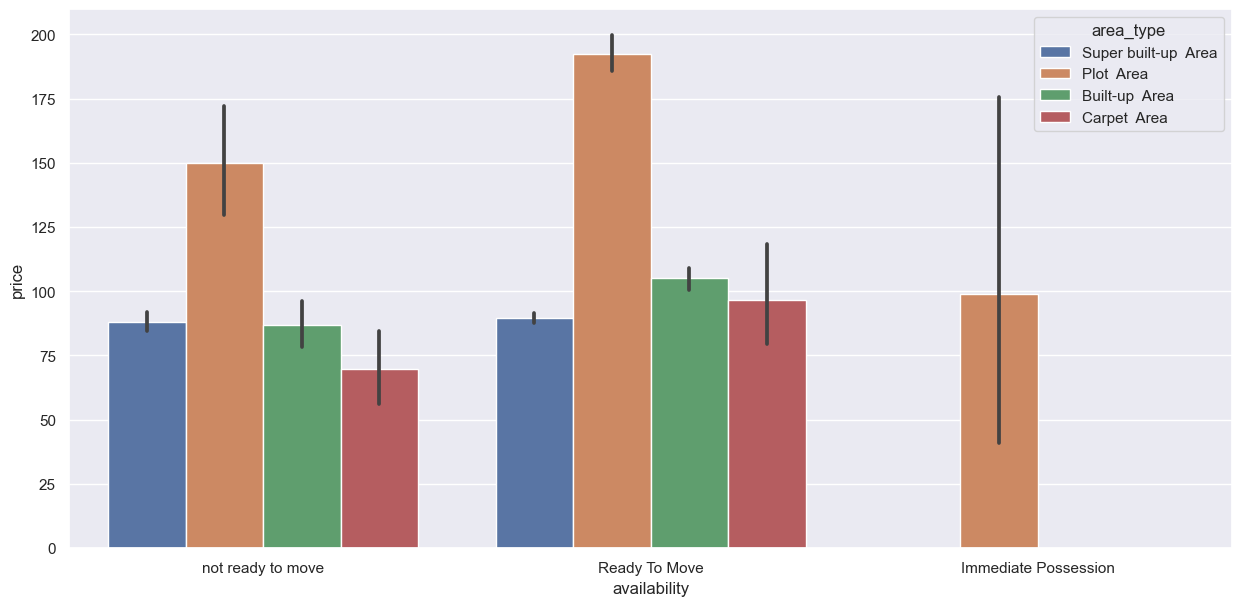

In [190]:
plt.figure(figsize=(15,7))
sns.barplot(data1["availability"], data1["price"], hue=data1["area_type"])

In [191]:
 data1["price"]

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13231, dtype: float64

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

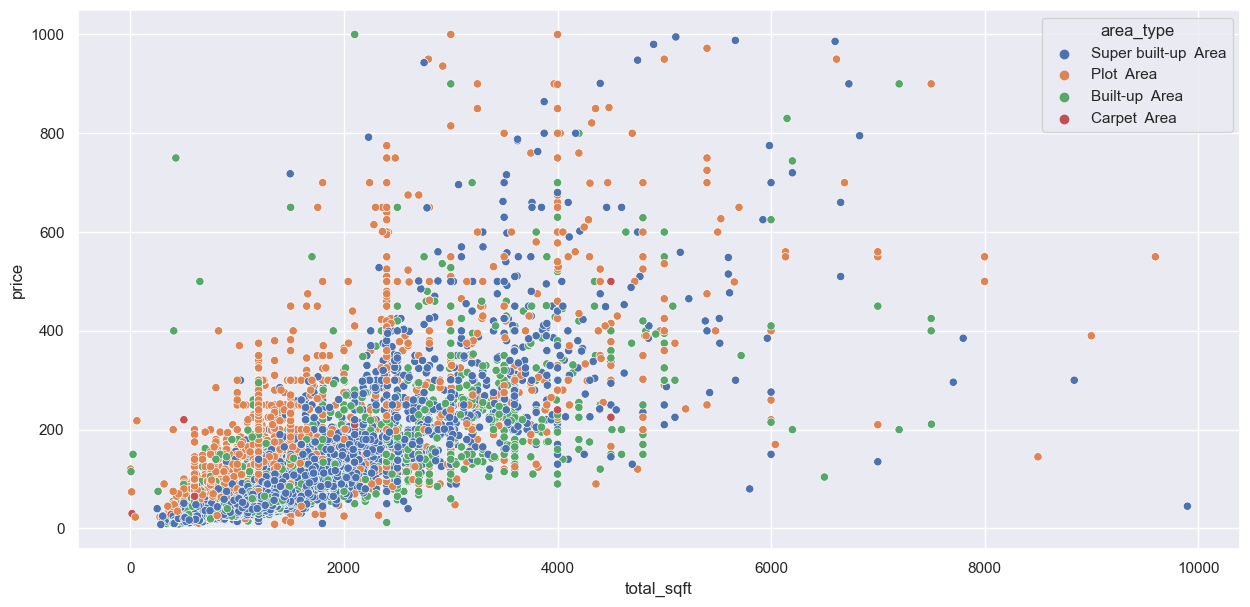

In [192]:
plt.figure(figsize=(15,7))
sns.scatterplot(data1["total_sqft"], data1["price"], hue=data1["area_type"])

In [193]:
# mostly data is dominated between the price range of 0 to 4cr and sqft range is 0 to 4000 sqft

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

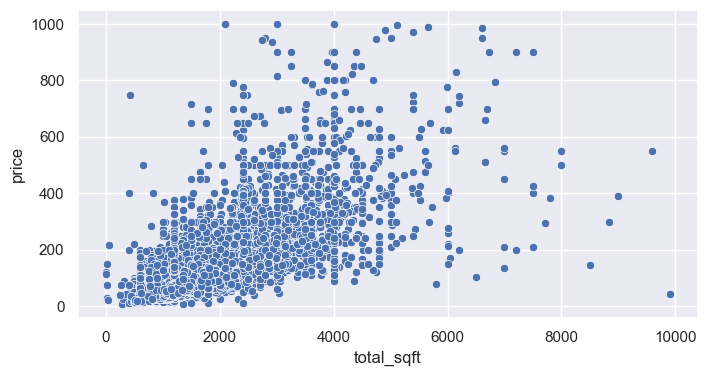

In [194]:
plt.figure(figsize=(8,4))
sns.scatterplot(data1["total_sqft"], data1["price"])

<AxesSubplot:xlabel='size', ylabel='price'>

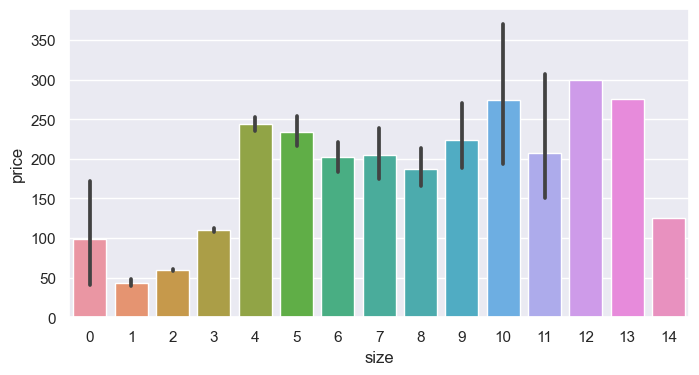

In [195]:
plt.figure(figsize=(8,4))
sns.barplot(data1["size"], data1["price"])

<AxesSubplot:xlabel='size', ylabel='count'>

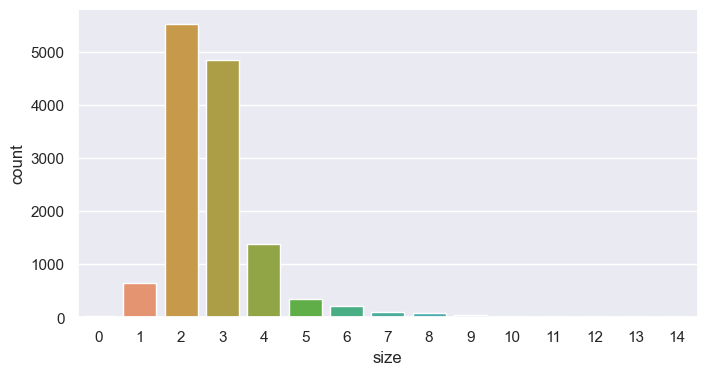

In [196]:
plt.figure(figsize=(8,4))
sns.countplot(data1["size"])

<AxesSubplot:xlabel='balcony', ylabel='count'>

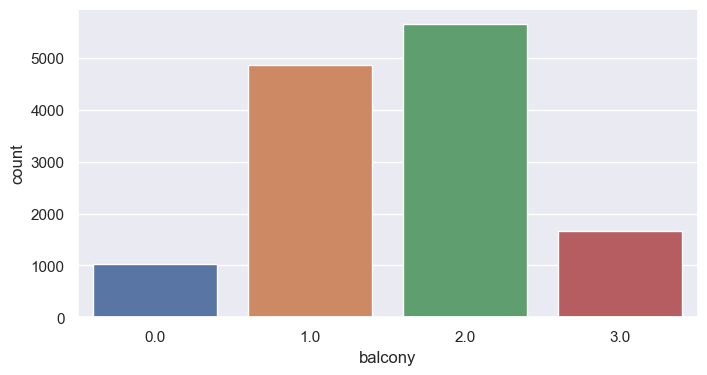

In [197]:
plt.figure(figsize=(8,4))
sns.countplot(data1["balcony"])

<AxesSubplot:xlabel='balcony', ylabel='total_sqft'>

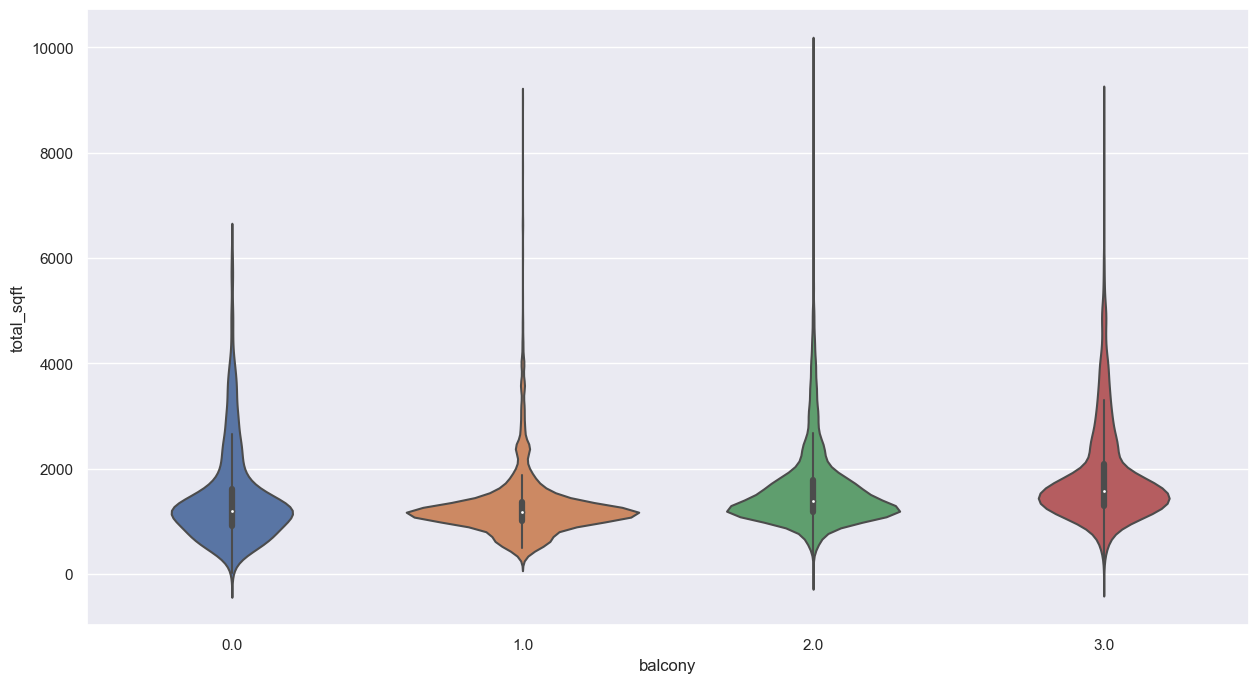

In [198]:
plt.figure(figsize=(15,8))
sns.violinplot(data1["balcony"], data1["total_sqft"])

<AxesSubplot:xlabel='size', ylabel='Density'>

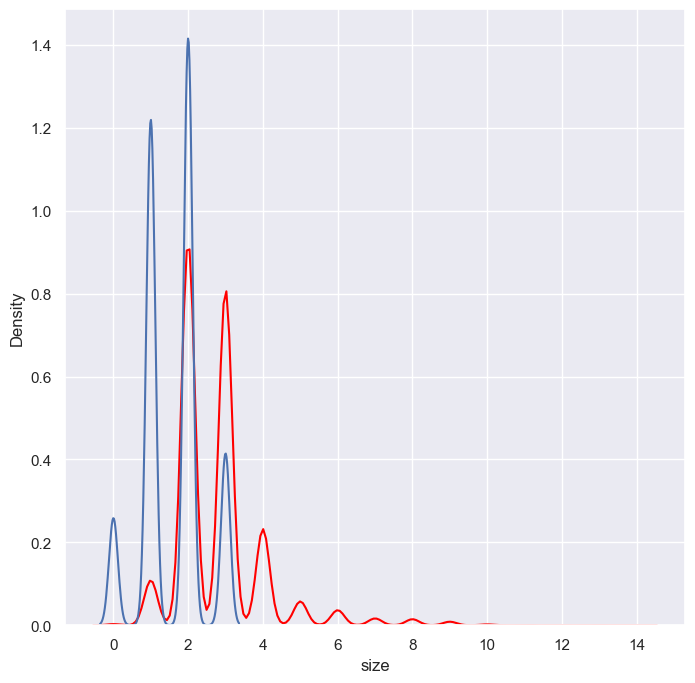

In [199]:
plt.figure(figsize=(8,8))
sns.kdeplot(data1["size"], color="red"),
sns.kdeplot(data1["balcony"])

<AxesSubplot:xlabel='size', ylabel='Density'>

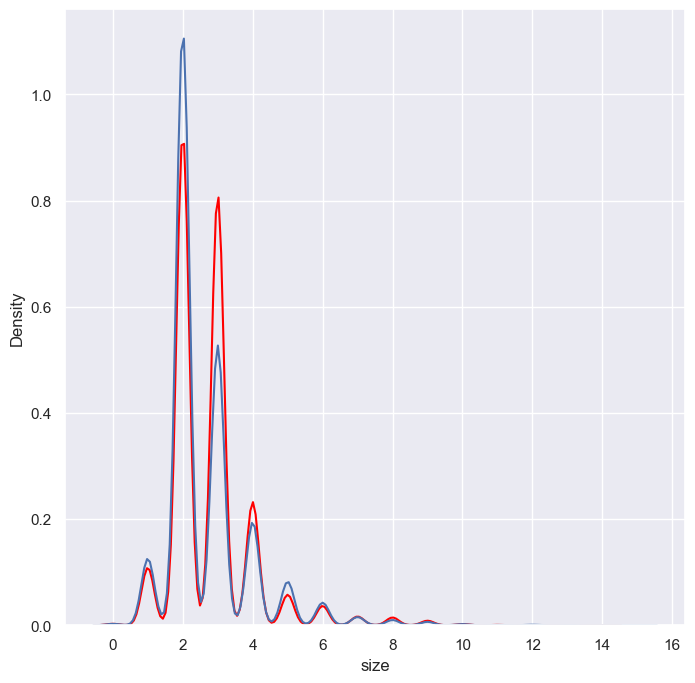

In [200]:
plt.figure(figsize=(8,8))
sns.kdeplot(data1["size"], color="red"),
sns.kdeplot(data1["bath"])

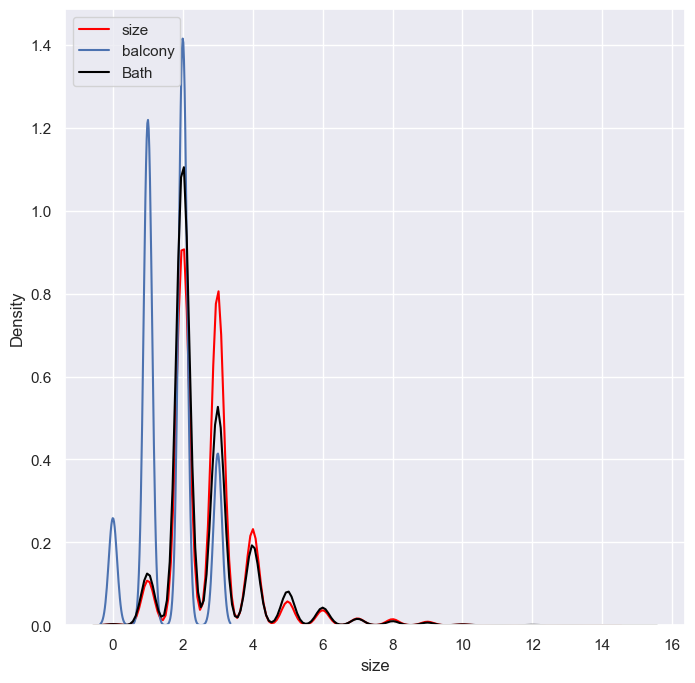

In [201]:
plt.figure(figsize=(8,8))
sns.kdeplot(data1["size"], color="red",label="size"),
sns.kdeplot(data1["balcony"],label="balcony")
sns.kdeplot(data1["bath"], color="black",label="Bath")
plt.legend(loc='upper left')
plt.show()

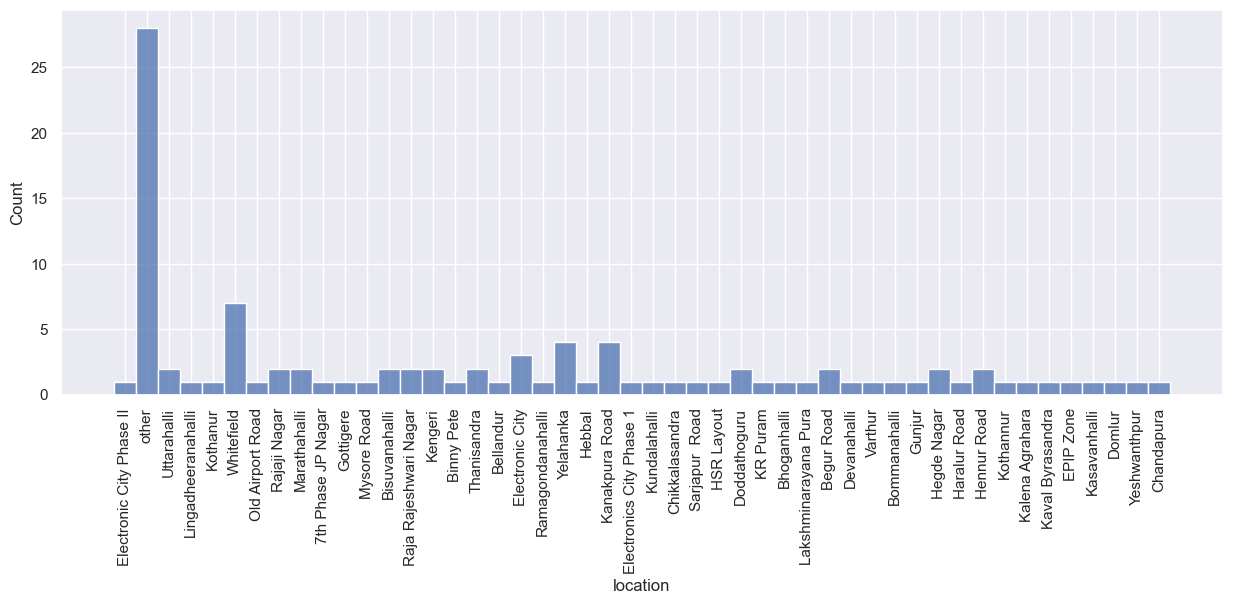

In [202]:
plt.figure(figsize=(15,5))
sns.histplot(data1["location"][:100])
plt.xticks(rotation=90)
plt.show()

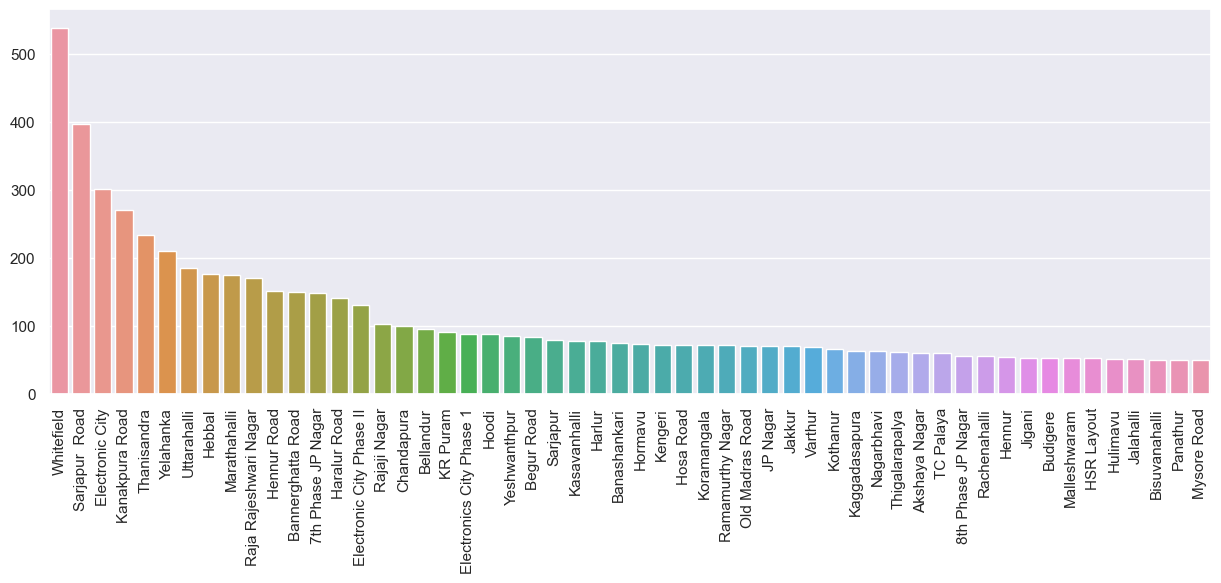

In [203]:
plt.figure(figsize=(15,5))
sns.barplot(x=data1["location"].value_counts().index[1:55], y=data1["location"].value_counts().values[1:55])
plt.xticks(rotation=90)
plt.show()

In [204]:
# mostly data reflecting to whitefield followed by sarjapur road

<AxesSubplot:xlabel='price', ylabel='Density'>

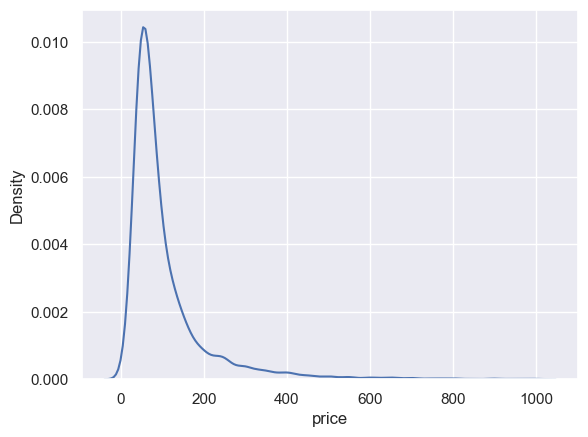

In [205]:
sns.kdeplot(data1["price"])

# Droping of unrequired column

In [206]:
data1 = data1.drop( "society", axis=1)
data1 = data1.drop( "balcony", axis=1)
data1 = data1.drop( "availability", axis=1)

In [207]:
data1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,39.07
1,Plot Area,other,4,2600.0,5.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,51.00


# Encoding

In [208]:
data1['location']= data1['location'].astype("category")
data1['location']= data1['location'].cat.codes
data1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,47,2,1056.0,2.0,39.07
1,Plot Area,143,4,2600.0,5.0,120.00
2,Built-up Area,134,3,1440.0,2.0,62.00
3,Super built-up Area,100,3,1521.0,3.0,95.00
4,Super built-up Area,94,2,1200.0,2.0,51.00


In [209]:
data1['location'].nunique()

144

In [210]:
data1

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,47,2,1056.0,2.0,39.07
1,Plot Area,143,4,2600.0,5.0,120.00
2,Built-up Area,134,3,1440.0,2.0,62.00
3,Super built-up Area,100,3,1521.0,3.0,95.00
4,Super built-up Area,94,2,1200.0,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,139,5,3453.0,4.0,231.00
13316,Super built-up Area,143,4,3600.0,5.0,400.00
13317,Built-up Area,115,2,1141.0,2.0,60.00
13318,Super built-up Area,111,4,4689.0,4.0,488.00


In [211]:
# data1= pd.get_dummies(data1, columns=["availability"],drop_first=True)

In [212]:
# data1= pd.get_dummies(data1, columns=["area_type"],drop_first=True)

In [213]:
data1['area_type']= data1['area_type'].astype("category")
data1['area_type']= data1['area_type'].cat.codes
data1.head()

,area_type,location,size,total_sqft,bath,price
0,3,47,2,1056.0,2.0,39.07
1,2,143,4,2600.0,5.0,120.00
2,0,134,3,1440.0,2.0,62.00
3,3,100,3,1521.0,3.0,95.00
4,3,94,2,1200.0,2.0,51.00


In [214]:
# from sklearn.preprocessing import LabelEncoder
# lb= LabelEncoder()
# data1["area_type"] = data1["area_type"].apply(lb.fit_transform)

In [215]:
# creating new column price per sq ft with the help of total sqft and price colum

data1["pp_sqft"] = data1["total_sqft"]/data1["price"]

In [216]:
data1.head()

,area_type,location,size,total_sqft,bath,price,pp_sqft
0,3,47,2,1056.0,2.0,39.07,27.028411
1,2,143,4,2600.0,5.0,120.00,21.666667
2,0,134,3,1440.0,2.0,62.00,23.225806
3,3,100,3,1521.0,3.0,95.00,16.010526
4,3,94,2,1200.0,2.0,51.00,23.529412


In [217]:
# frequency_map = data1['location'].value_counts(normalize=True).to_dict()

In [218]:
# data1['location_freq_encoded'] = data1['location'].map(frequency_map)

In [219]:

# data1 = data1.drop("area_type", axis= 1)
# data1 = data1.drop("availability", axis= 1)
# data1 = data1.drop("pp_sqft", axis= 1)
# data1 = data1.drop("balcony", axis= 1)
# data1 = data1.drop("bath", axis= 1)

In [220]:
#  data1 = data1.drop("location", axis= 1)

In [221]:
data1

,area_type,location,size,total_sqft,bath,price,pp_sqft
0,3,47,2,1056.0,2.0,39.07,27.028411
1,2,143,4,2600.0,5.0,120.00,21.666667
2,0,134,3,1440.0,2.0,62.00,23.225806
3,3,100,3,1521.0,3.0,95.00,16.010526
4,3,94,2,1200.0,2.0,51.00,23.529412
...,...,...,...,...,...,...,...
13315,0,139,5,3453.0,4.0,231.00,14.948052
13316,3,143,4,3600.0,5.0,400.00,9.000000
13317,0,115,2,1141.0,2.0,60.00,19.016667
13318,3,111,4,4689.0,4.0,488.00,9.608607


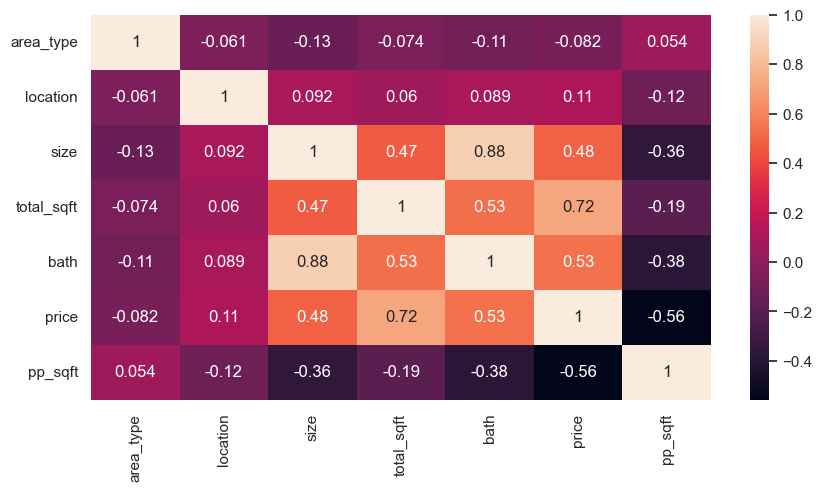

In [222]:
plt.figure(figsize= [10,5])
sns.heatmap(data1.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

In [223]:
#  data1.drop([ "size", "total_sqft"], axis=1, inplace= True)

In [224]:
data1.head()

,area_type,location,size,total_sqft,bath,price,pp_sqft
0,3,47,2,1056.0,2.0,39.07,27.028411
1,2,143,4,2600.0,5.0,120.00,21.666667
2,0,134,3,1440.0,2.0,62.00,23.225806
3,3,100,3,1521.0,3.0,95.00,16.010526
4,3,94,2,1200.0,2.0,51.00,23.529412


# Split the Dataset into x and y column

In [225]:

x = data1.drop("price", axis=1)
y = data1[["price"]]

In [226]:
x

,area_type,location,size,total_sqft,bath,pp_sqft
0,3,47,2,1056.0,2.0,27.028411
1,2,143,4,2600.0,5.0,21.666667
2,0,134,3,1440.0,2.0,23.225806
3,3,100,3,1521.0,3.0,16.010526
4,3,94,2,1200.0,2.0,23.529412
...,...,...,...,...,...,...
13315,0,139,5,3453.0,4.0,14.948052
13316,3,143,4,3600.0,5.0,9.000000
13317,0,115,2,1141.0,2.0,19.016667
13318,3,111,4,4689.0,4.0,9.608607


In [227]:
y

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00
...,...
13315,231.00
13316,400.00
13317,60.00
13318,488.00


# scaling on the dataset

In [228]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_scale = sc.fit_transform(x)

In [229]:
x_scale

array([[1.        , 0.32867133, 0.14285714, 0.10657642, 0.13333333,
        0.12282319],
       [0.66666667, 1.        , 0.28571429, 0.26255177, 0.33333333,
        0.0984507 ],
       [0.        , 0.93706294, 0.21428571, 0.14536822, 0.13333333,
        0.10553797],
       ...,
       [0.        , 0.8041958 , 0.14285714, 0.11516315, 0.13333333,
        0.08640479],
       [1.        , 0.77622378, 0.28571429, 0.47358319, 0.26666667,
        0.04363926],
       [1.        , 0.3006993 , 0.07142857, 0.05546015, 0.06666667,
        0.14702651]])

# train_test_split

In [230]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size= 0.20, random_state= 101)

In [231]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((10584, 6), (2647, 6), (10584, 1), (2647, 1))

# appling model

# Model  1 (Linear model)


In [232]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# prediction

In [233]:
y_test_pre = lr.predict(x_test)
y_train_pre = lr.predict(x_train)

# validation

In [234]:
from sklearn.metrics import r2_score
test_val_lr = r2_score(y_test, y_test_pre)
train_val_lr = r2_score(y_train, y_train_pre)

In [235]:
print(train_val_lr)
print(test_val_lr)

0.7012429874903648
0.7327871434157434


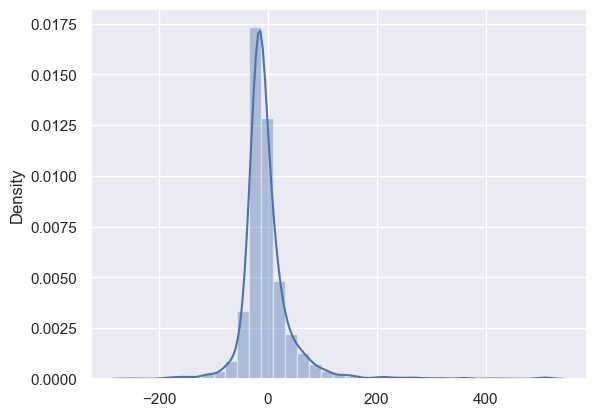

In [236]:
sns.distplot(y_test- y_test_pre, bins= 35)
plt.show()


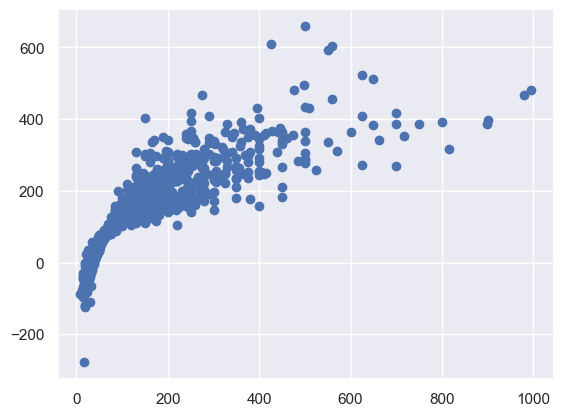

In [237]:
plt.scatter(y_test,y_test_pre )

# Checking Error

In [238]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [239]:
# Linear Model Error

#Returns the mean squared error; we'll take a square root
print("root mean square error on test : ",  np.sqrt(mean_squared_error(y_test, y_test_pre)))
print("mean square error on test : ",  mean_squared_error(y_test, y_test_pre))
print("mean_absolute_percentage_error on test : ",  mean_absolute_percentage_error(y_test, y_test_pre)/100)
print("mean_absolute_error on test : ",  mean_absolute_error(y_test, y_test_pre))

root mean square error on test :  50.7080410784872
mean square error on test :  2571.3054300175454
mean_absolute_percentage_error on test :  0.003787273735606323
mean_absolute_error on test :  29.35491369580446


# VIF

In [240]:
# add constant
import statsmodels.api as sm
addcon=sm.add_constant(x)

In [241]:
addcon.head()

,const,area_type,location,size,total_sqft,bath,pp_sqft
0,1.0,3,47,2,1056.0,2.0,27.028411
1,1.0,2,143,4,2600.0,5.0,21.666667
2,1.0,0,134,3,1440.0,2.0,23.225806
3,1.0,3,100,3,1521.0,3.0,16.010526
4,1.0,3,94,2,1200.0,2.0,23.529412


In [242]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["Variance"]= [variance_inflation_factor(addcon, i) for i in range(addcon.shape[1])]
vif["features"]=addcon.columns
vif

,Variance,features
0,29.672230,const
1,1.021077,area_type
2,1.020143,location
3,4.555481,size
4,1.391786,total_sqft
5,5.008316,bath
6,1.182337,pp_sqft


In [243]:
addcon= addcon.drop("const", axis=1)

In [244]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["Variance"]= [variance_inflation_factor(addcon, i) for i in range(addcon.shape[1])]
vif["features"]=addcon.columns
vif

,Variance,features
0,4.092023,area_type
1,4.818597,location
2,27.620465,size
3,6.166585,total_sqft
4,27.682329,bath
5,4.168605,pp_sqft


In [245]:
addcon= addcon.drop("bath", axis=1)

In [246]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["Variance"]= [variance_inflation_factor(addcon, i) for i in range(addcon.shape[1])]
vif["features"]=addcon.columns
vif

,Variance,features
0,4.077857,area_type
1,4.812807,location
2,6.863677,size
3,5.637472,total_sqft
4,4.093819,pp_sqft


# OLS Technique

In [247]:
x_train

array([[1.        , 0.94405594, 0.14285714, 0.06798667, 0.06666667,
        0.15391953],
       [1.        , 0.18181818, 0.14285714, 0.11708253, 0.13333333,
        0.11980137],
       [1.        , 0.24475524, 0.21428571, 0.18375593, 0.2       ,
        0.09729201],
       ...,
       [1.        , 1.        , 0.14285714, 0.11607233, 0.13333333,
        0.07236476],
       [1.        , 0.93706294, 0.21428571, 0.13425599, 0.13333333,
        0.12983717],
       [1.        , 0.28671329, 0.07142857, 0.10849581, 0.13333333,
        0.0929153 ]])

In [248]:
y_train

,price
11116,19.90
383,44.00
11595,85.00
10459,33.00
764,55.00
...,...
5734,75.00
8064,165.00
1377,72.20
1563,46.55


In [249]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [250]:
X_train_sm

array([[1.        , 1.        , 0.94405594, ..., 0.06798667, 0.06666667,
        0.15391953],
       [1.        , 1.        , 0.18181818, ..., 0.11708253, 0.13333333,
        0.11980137],
       [1.        , 1.        , 0.24475524, ..., 0.18375593, 0.2       ,
        0.09729201],
       ...,
       [1.        , 1.        , 1.        , ..., 0.11607233, 0.13333333,
        0.07236476],
       [1.        , 1.        , 0.93706294, ..., 0.13425599, 0.13333333,
        0.12983717],
       [1.        , 1.        , 0.28671329, ..., 0.10849581, 0.13333333,
        0.0929153 ]])

In [251]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const      68.162118
x1         -3.043620
x2          6.983235
x3         14.020750
x4        805.642221
x5         52.598395
x6      -1155.920122
dtype: float64

In [252]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     4138.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:12:46   Log-Likelihood:                -58136.
No. Observations:               10584   AIC:                         1.163e+05
Df Residuals:                   10577   BIC:                         1.163e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.1621      3.093     22.040      0.0

# RandomForestRegressor

In [253]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()

# Train the model
rand.fit(x_train, y_train)

RandomForestRegressor()

# Prediction

In [254]:
y_test_ran = rand.predict(x_test)
y_train_ran = rand.predict(x_train)

# R2 SCORE

In [255]:
from sklearn.metrics import r2_score
test_val_ran = r2_score(y_test, y_test_ran)
train_val_ran = r2_score(y_train, y_train_ran)

In [256]:
print(train_val_ran)
print(test_val_ran)

0.9986418717311917
0.9980160678993878


# Cheking Error

In [257]:
# Random Forest Algorithm Eroor

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#Returns the mean squared error; we'll take a square root
print("root mean square error on test : ",  np.sqrt(mean_squared_error(y_test, y_test_ran)))
print("mean square error on test : ",  mean_squared_error(y_test, y_test_ran))
print("mean_absolute_percentage_error on test : ",  mean_absolute_percentage_error(y_test, y_test_ran)/100)
print("mean_absolute_error on test : ",  mean_absolute_error(y_test, y_test_ran))

root mean square error on test :  4.36929694205945
mean square error on test :  19.090755767890062
mean_absolute_percentage_error on test :  6.834332507401052e-05
mean_absolute_error on test :  1.023322364941444



# Ridge

In [258]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha = 0.3)
rdg.fit(x_train, y_train)

Ridge(alpha=0.3)

# Prediction

In [259]:
y_test_rdg = rdg.predict(x_test)
y_train_rdg = rdg.predict(x_train)

# Validation

In [260]:
test_val_rdg = r2_score(y_test, y_test_rdg)
train_val_rdg = r2_score(y_train, y_train_rdg)

In [261]:
print(test_val_rdg)
print(train_val_rdg)

0.7320532810851188
0.7011639226439581


# Error checking

In [262]:
# Error in Ridge Algorithm

print("root mean square error on test : ",  np.sqrt(mean_squared_error(y_test, y_test_rdg)))
print("mean square error on test : ",  mean_squared_error(y_test, y_test_rdg))
print("mean_absolute_percentage_error on test : ",  mean_absolute_percentage_error(y_test, y_test_rdg)/100)
print("mean_absolute_error on test : ",  mean_absolute_error(y_test, y_test_rdg))

root mean square error on test :  50.77762456866373
mean square error on test :  2578.3671568361624
mean_absolute_percentage_error on test :  0.0037236326482586986
mean_absolute_error on test :  29.181189778630497


# GradientBoostingRegressor

In [263]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [264]:
# Initialize the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=8, random_state=52)

# Fit the model to the training data
gb_regressor.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_gd = gb_regressor.predict(x_test)
y_pred_tr_gd = gb_regressor.predict(x_train)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred_gd)
print("Mean Squared Error:", mse)

Mean Squared Error: 1343.7302119369203


# Prediction

In [265]:
y_val  = r2_score(y_test, y_pred_gd)
y_val_train = r2_score(y_train, y_pred_tr_gd)

# Validation

In [266]:
y_val

0.8603580950677714

In [267]:
y_val_train

0.8641977347005209

from sklearn.linear_model import Ridge
rdg = Ridge(alpha = 0.3)
rdg.fit(x_train, y_train)

# Checking Error

In [268]:
# GradienBossting Error
print("root mean square error on test : ",  np.sqrt(mean_squared_error(y_test, y_pred_gd)))
print("mean square error on test : ",  mean_squared_error(y_test, y_pred_gd))
print("mean_absolute_percentage_error on test : ",  mean_absolute_percentage_error(y_test, y_pred_gd)/100)
print("mean_absolute_error on test : ",  mean_absolute_error(y_test, y_pred_gd))

root mean square error on test :  36.656925838604096
mean square error on test :  1343.7302119369203
mean_absolute_percentage_error on test :  0.003189449256023114
mean_absolute_error on test :  23.317868912388835


# Decision Tree

In [269]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

# Prediction

In [270]:
y_test_dt = dt.predict(x_test)
y_train_dt = dt.predict(x_train)

# Validation

In [271]:
test_val_dt = r2_score(y_test, y_test_dt)
train_val_dt = r2_score(y_train, y_train_dt)
print(test_val_dt)
print(train_val_dt)

0.9953026692584671
1.0


# Checking Error

In [272]:
# Decision Tree Error
print("root mean square error on test : ",  np.sqrt(mean_squared_error(y_test, y_test_dt)))
print("mean square error on test : ",  mean_squared_error(y_test, y_test_dt))
print("mean_absolute_percentage_error on test : ",  mean_absolute_percentage_error(y_test, y_test_dt)/100)
print("mean_absolute_error on test : ",  mean_absolute_error(y_test, y_test_dt))

root mean square error on test :  6.723164362426444
mean square error on test :  45.20093904420098
mean_absolute_percentage_error on test :  0.00013510378628047202
mean_absolute_error on test :  1.996161692482055


In [316]:
lr = LinearRegression()
gb_regressor = GradientBoostingRegressor()

estimator = [("RAN_FO", rand), ("ridge",rdg), ("decision", dt), ("linear", lr),("GradientBoostingRegressor",  gb_regressor)]

In [317]:
from sklearn.model_selection import cross_val_score
for name, estimator in estimator:
    train_scores = cross_val_score(estimator, x_train, y_train, scoring="r2", cv=10)
    test_scores = cross_val_score(estimator, x_test, y_test, scoring="r2", cv=10)
    print(name)
    print("Train R2 score:", np.mean(train_scores))
    print("Test R2 score:", np.mean(test_scores))

RAN_FO
Train R2 score: 0.9915975646004309
Test R2 score: 0.9865374558179558
ridge
Train R2 score: 0.7021820019904947
Test R2 score: 0.7382440498959197
decision
Train R2 score: 0.974451111170878
Test R2 score: 0.9773310115142625
linear
Train R2 score: 0.7021682529902789
Test R2 score: 0.7396677120172402
GradientBoostingRegressor
Train R2 score: 0.9917730815376118
Test R2 score: 0.9901450208084069


### Conclusion - : In analyzing the dataset for house price prediction, crucial variables like area_type, size, location, and total_sqft were identified. Among algorithms, Gradient Boosting Regressor stood out as the optimal choice, demonstrating robust performance without overfitting or underfitting. Its efficacy surpassed alternative methods, particularly decision tree algorithms, in delivering accurate predictions for new data points. This underscores Gradient Boosting Regressor's superiority and reliability in producing precise house price estimations, making it the preferred algorithm for this task.
